<div style="background-color:#f2f6fc; padding:10px; border-radius:5px; border:1px solid #d6e0f0">

**Name:** Shikha Pandey  
**Student Number:** 2462279  
**Dataset used:** BeijingPM20100101_20151231.csv

</div>


The Beijing PM2.5 dataset records hourly air pollution and weather data from 2010 to 2015, including PM2.5 levels from four monitoring stations. It also includes temperature, humidity, dew point, pressure, wind speed and direction, precipitation, and season.
Some PM2.5 values are missing, and wind direction is categorical, making it a useful dataset for studying how weather affects air pollution.

### **Input Features**
* **Time-based features:** `year`, `month`, `day`, `hour`, `season`
* **Weather Features:**
    * **TEMP:** Temperature
    * **DEWP:** Dew point (moisture indicator)
    * **HUMI:** Relative humidity
    * **PRES:** Atmospheric pressure
* **Wind & Precipitation features:**
    * **cbwd:** Combined wind direction (Categorical: NE, NW, SE, etc.)
    * **Iws:** Integrated wind speed (Cumulative wind speed)
    * **precipitation:** Rainfall amount
    * **Iprec:** Integrated precipitation (Cumulative precipitation)

### **Target Columns**
* **PM_US Post:** PM2.5 measured at the US Embassy
* **PM_Nongzhanguan:** Measurement station Nongzhanguan (Chinese government site)
* **PM_Dongsihuan:** Station near Dongsihuan (Close to major roads)
* **PM_Dongsi:** Station at Dongsi (Urban residential area)



**PM2.5** refers to Particulate Matter with a particle diameter $\le 2.5$ micrometers.



* **Sources:** Particles come from vehicles, factories, coal burning, and dust.
* **Health Impact:** These particles go deep into lungs and can enter the bloodstream.
---

<h2>Loading Dataset and basic info</h2>

In [1]:
#Importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from scipy import stats

In [2]:
# Loading dataset

df = pd.read_csv("BeijingPM20100101_20151231.csv")

In [3]:
# Checking the shape of dataset

print("Dataset shape:", df.shape)

Dataset shape: (52584, 18)


In [4]:
# Basic info

print("\nDataFrame info:")
print(df.info())


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64


In [5]:

# Summary statistics of the data

print("\nSummary statistics:")
print(df.describe())



Summary statistics:
                 No          year         month           day          hour  \
count  52584.000000  52584.000000  52584.000000  52584.000000  52584.000000   
mean   26292.500000   2012.499772      6.523962     15.726609     11.500000   
std    15179.837614      1.707485      3.448452      8.798896      6.922252   
min        1.000000   2010.000000      1.000000      1.000000      0.000000   
25%    13146.750000   2011.000000      4.000000      8.000000      5.750000   
50%    26292.500000   2012.000000      7.000000     16.000000     11.500000   
75%    39438.250000   2014.000000     10.000000     23.000000     17.250000   
max    52584.000000   2015.000000     12.000000     31.000000     23.000000   

             season     PM_Dongsi  PM_Dongsihuan  PM_Nongzhanguan  \
count  52584.000000  25052.000000   20508.000000     24931.000000   
mean       2.491100     89.154439      92.560806        88.643737   
std        1.116988     87.239267      88.027434        88.0

In [6]:
# Checking unique values in cbwd

print("Unique wind directions in 'cbwd':")
print(df['cbwd'].value_counts().sort_index())
print(f"\nTotal unique values: {df['cbwd'].nunique()}")

Unique wind directions in 'cbwd':
cbwd
NE     6178
NW    16717
SE    18272
cv    11412
Name: count, dtype: int64

Total unique values: 4


In [7]:
# Checking unique values in season

print("Unique values in 'season':")
print(df['season'].value_counts().sort_index())
print(f"\nTotal unique values: {df['season'].nunique()}")

Unique values in 'season':
season
1    13248
2    13248
3    13104
4    12984
Name: count, dtype: int64

Total unique values: 4


In [8]:
# Check unique values in year

print(" Unique values in 'year':")
print(df['year'].value_counts().sort_index())
print(f"\nTotal unique values: {df['year'].nunique()}")

 Unique values in 'year':
year
2010    8760
2011    8760
2012    8784
2013    8760
2014    8760
2015    8760
Name: count, dtype: int64

Total unique values: 6


In [9]:
# Checking number of days

print("Unique value in 'day':")
print(df['day'].value_counts().sort_index())
print(f"\nTotal unique values: {df['day'].nunique()}")

Unique value in 'day':
day
1     1728
2     1728
3     1728
4     1728
5     1728
6     1728
7     1728
8     1728
9     1728
10    1728
11    1728
12    1728
13    1728
14    1728
15    1728
16    1728
17    1728
18    1728
19    1728
20    1728
21    1728
22    1728
23    1728
24    1728
25    1728
26    1728
27    1728
28    1728
29    1608
30    1584
31    1008
Name: count, dtype: int64

Total unique values: 31


In [10]:
# Checking unique values in month

print("Unique value in 'month':")
print(df['month'].value_counts().sort_index())
print(f"\nTotal unique values: {df['month'].nunique()}")

Unique value in 'month':
month
1     4464
2     4056
3     4464
4     4320
5     4464
6     4320
7     4464
8     4464
9     4320
10    4464
11    4320
12    4464
Name: count, dtype: int64

Total unique values: 12


In [11]:
print("Unique values in 'hour':")
print(df['hour'].value_counts().sort_index())
print(f"\nTotal unique values: {df['hour'].nunique()}")

Unique values in 'hour':
hour
0     2191
1     2191
2     2191
3     2191
4     2191
5     2191
6     2191
7     2191
8     2191
9     2191
10    2191
11    2191
12    2191
13    2191
14    2191
15    2191
16    2191
17    2191
18    2191
19    2191
20    2191
21    2191
22    2191
23    2191
Name: count, dtype: int64

Total unique values: 24


<h1>check missing values</h1>

In [12]:
# Counting missing values
missing_counts = df.isnull().sum()

# Calculating total rows
total_rows = len(df)

# Computing missing percentage for columns with missing values
missing_percent = {}
for column in missing_counts.index:
    percent = (missing_counts[column] / total_rows) * 100
    if percent > 0:
        missing_percent[column] = percent

# printing
print("\nColumns with missing values (in %):")
for column, percent in missing_percent.items():
    print(f"{column}: {percent:.2f}%")



Columns with missing values (in %):
PM_Dongsi: 52.36%
PM_Dongsihuan: 61.00%
PM_Nongzhanguan: 52.59%
PM_US Post: 4.18%
DEWP: 0.01%
HUMI: 0.64%
PRES: 0.64%
TEMP: 0.01%
cbwd: 0.01%
Iws: 0.01%
precipitation: 0.92%
Iprec: 0.92%


<h1>Check for duplicates:</h1>


In [13]:

df_transposed = df.T
duplicated_rows = df_transposed.duplicated()

# Get duplicate column names
duplicate_cols = df.columns[duplicated_rows]

# Print results
print("\nDuplicate columns in the dataset:")
print(duplicate_cols)



Duplicate columns in the dataset:
Index([], dtype='object')


<h1>Checking for corelation</h1>

In [14]:
# Step 1: Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Step 2: Compute correlation matrix
corr_matrix = numeric_df.corr()

# Step 3: Find highly correlated pairs (abs(corr) > 0.999)
duplicate_like_cols = []
for c1 in corr_matrix.columns:
    for c2 in corr_matrix.columns:
        if c1 != c2 and abs(corr_matrix.loc[c1, c2]) > 0.999:
            duplicate_like_cols.append((c1, c2))

# Step 4: Print results
print("\nColumns that are nearly identical (correlation > 0.999):")
print(duplicate_like_cols)




Columns that are nearly identical (correlation > 0.999):
[('precipitation', 'Iprec'), ('Iprec', 'precipitation')]


<h1>Inspect Rainy Hours (precipitation vs Iprec)</h1>

In [15]:
#Checking precipitation and Iprec where results are not 0

rain_rows = df[(df['precipitation'] != 0) | (df['Iprec'] != 0)]
print("\nRows with actual precipitation:")
print(rain_rows[['precipitation', 'Iprec']].head(20))
print(f"\nTotal hours with precipitation: {len(rain_rows)}")



Rows with actual precipitation:
    precipitation  Iprec
48            0.4    0.4
49            0.5    0.9
50            0.5    1.4
51            0.7    2.1
52            1.2    3.3
53            0.7    4.0
54            1.0    5.0
55            0.7    5.7
56            0.5    6.2
57            0.7    6.9
58            0.4    7.3
59            0.5    7.8
60            1.1    8.9
61            0.5    9.4
62            0.3    9.7
63            0.5   10.2
64            0.2   10.4
65            0.1   10.5
66            0.4   10.9
67            0.3   11.2

Total hours with precipitation: 2498


Iprec is not dropped because, although it is highly correlated with precipitation, it represents cumulative precipitation over time, which provides different information from the hourly values.
Keeping it can help the model capture rainfall accumulation effects on PM2.5.

<h1>Outlier Detection (IQR Method)</h1>

In [16]:
#Detecting IQR using outlier method 

outliers = {}

for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    num_outliers = ((numeric_df[col] < lower) | (numeric_df[col] > upper)).sum()
    if num_outliers > 0:
        outliers[col] = num_outliers

print("\nColumns with outliers and their counts:")
for col, count in outliers.items():
    print(f"{col}: {count}")



Columns with outliers and their counts:
PM_Dongsi: 1119
PM_Dongsihuan: 959
PM_Nongzhanguan: 1243
PM_US Post: 2296
Iws: 6192
precipitation: 2014
Iprec: 2014


PM_US Post, PM_Dongsihuan, PM_Nongzhanguan, PM_Dongsi:
High PM2.5 values represent real pollution events, so removing them would distort true air quality patterns.

precipitation / Iprec:
Rainfall data is naturally skewed with rare but valid heavy events that the IQR method incorrectly flags as outliers.

Iws:
As a cumulative wind speed variable, large values are expected over time and do not indicate errors.

<h1>Distribution of Numeric Columns</h1>

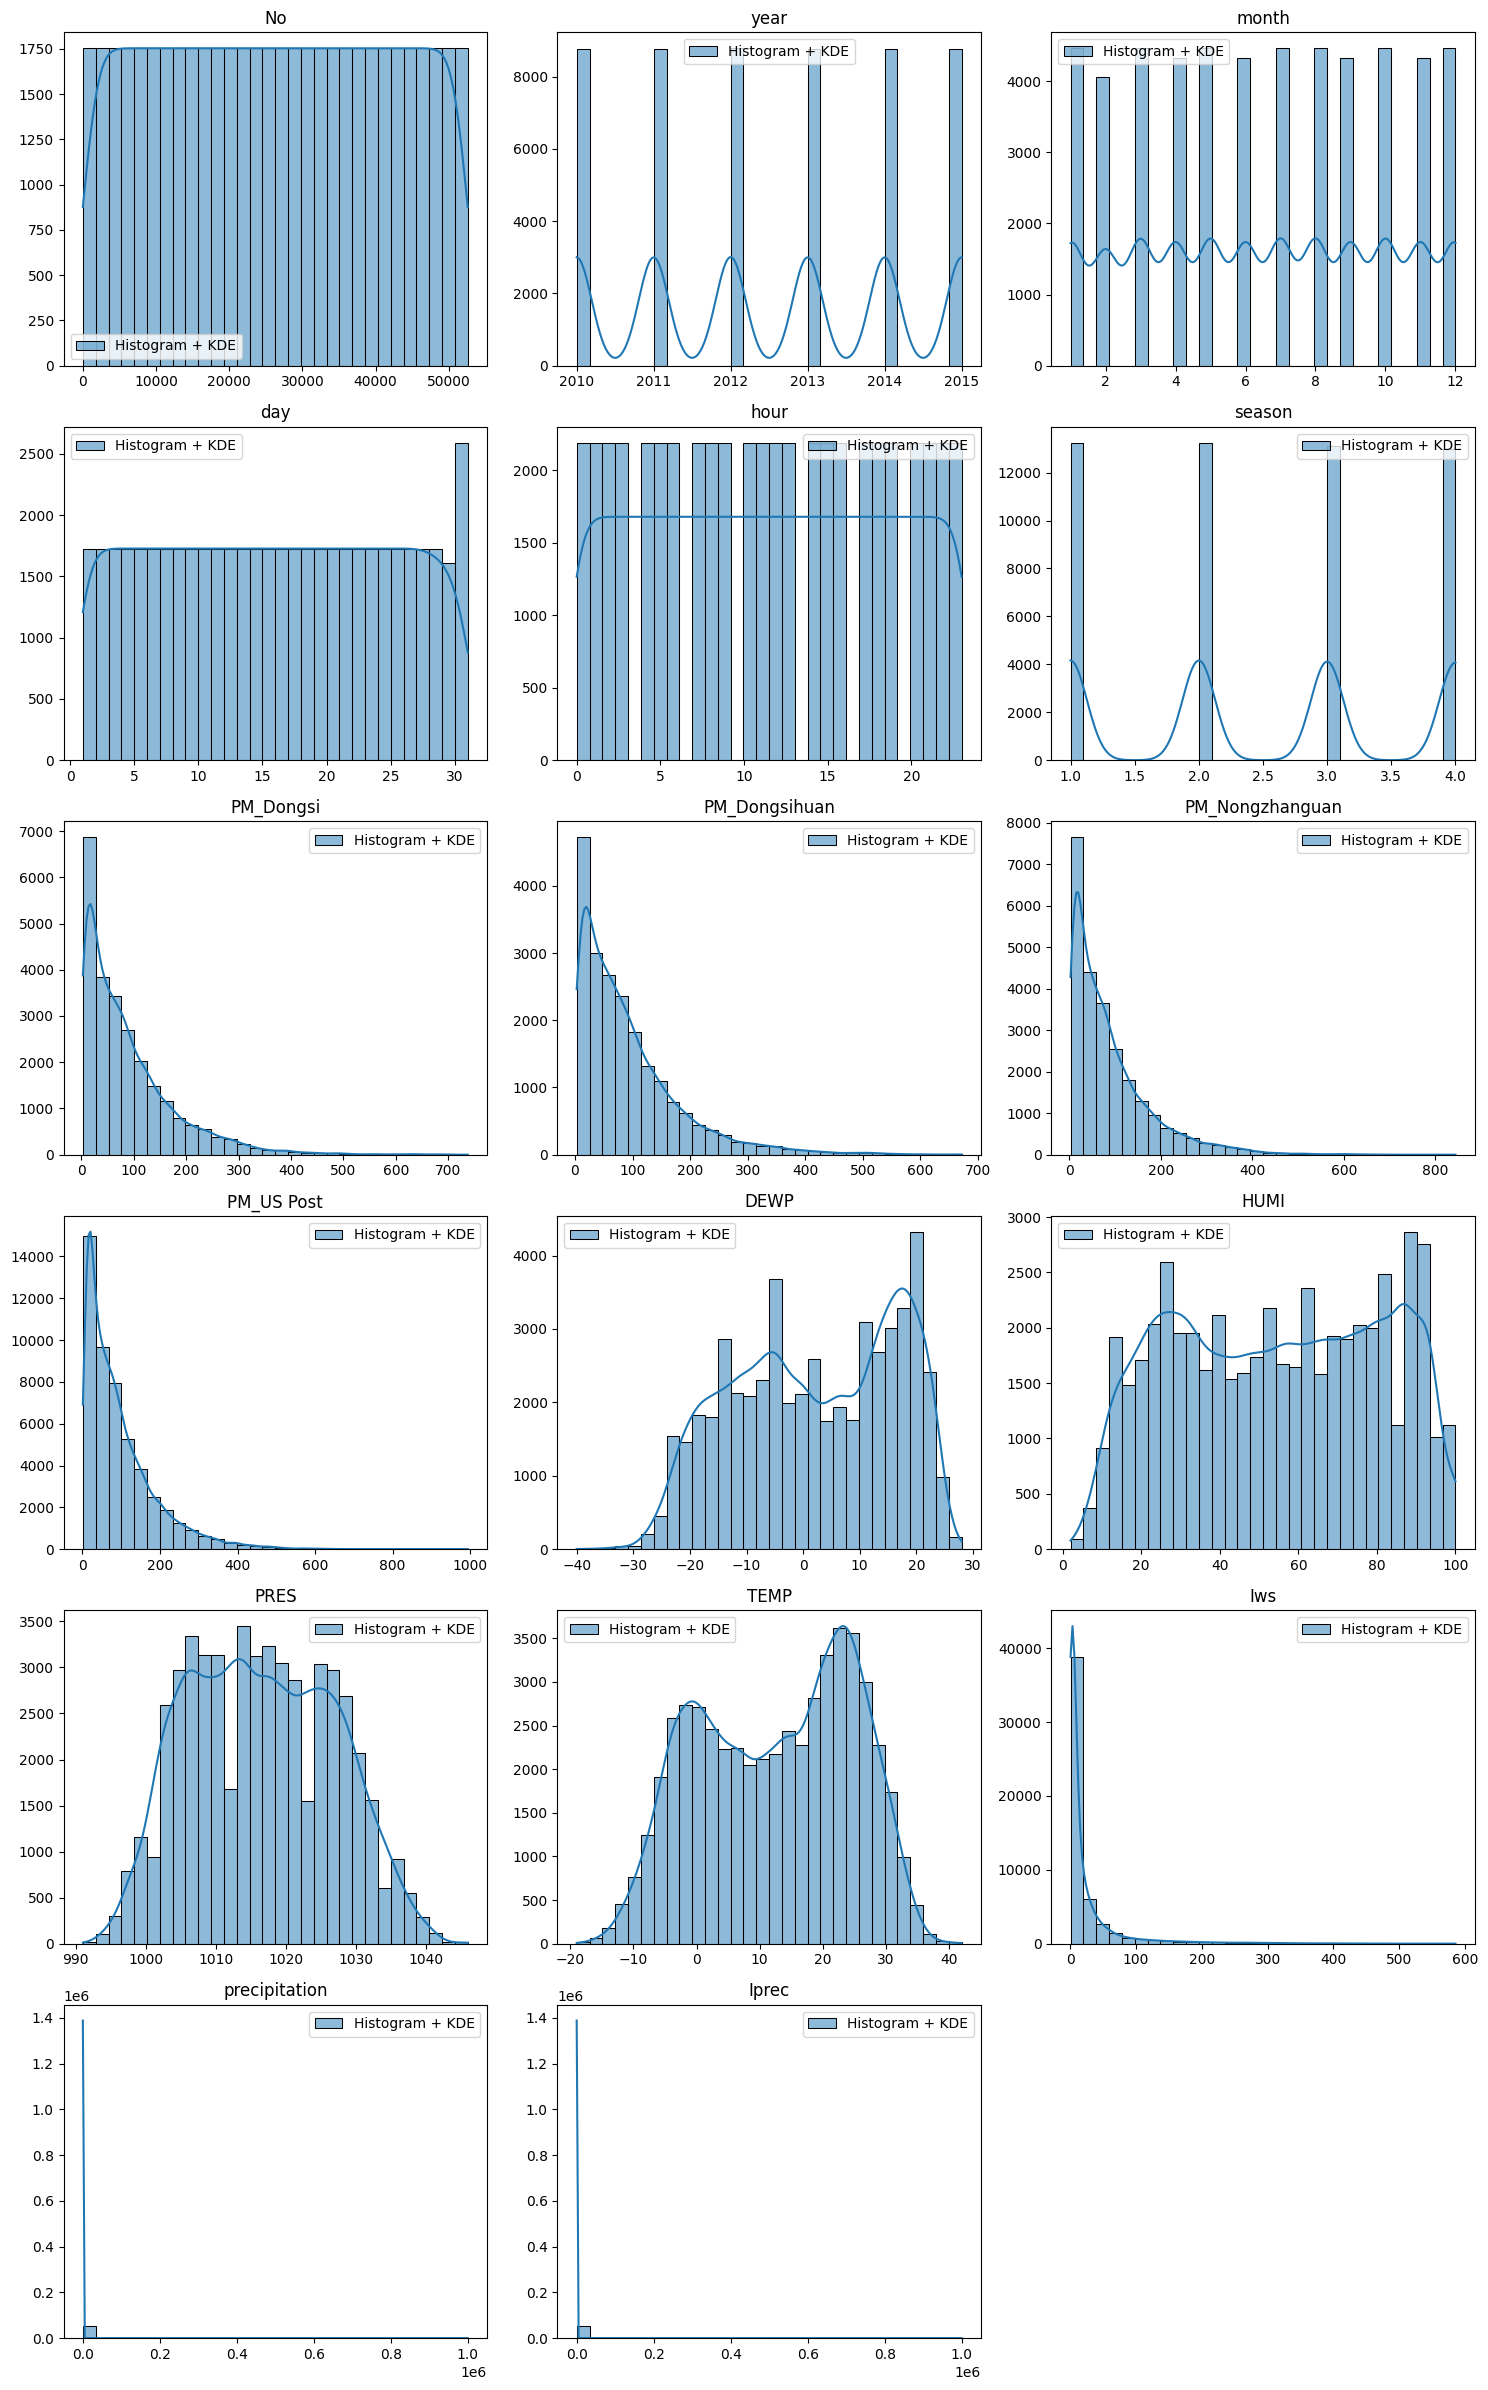

In [17]:


# Numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Grid layout: 3 plots per row
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(15, n_rows * 4))  
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Histogram
    sns.histplot(df[col].dropna(), bins=30, kde=True, edgecolor='black', label='Histogram + KDE')
    
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend()  

plt.tight_layout()
plt.show()


The distribution plots show how the numeric features in the Beijing air quality dataset are spread. Time variables like year, month, day, and hour are fairly uniform, covering all periods evenly, while PM 2.5 levels are heavily right-skewed, meaning most readings are low but occasional spikes occur. Weather features like temperature and dew point show two peaks for summer and winter, pressure is roughly normal, and humidity varies widely. Precipitation and wind are mostly low or zero, with rare high values. For modeling, these plots highlight the need to normalize or standardize the variables (which you did) and to handle outliers carefully, since extreme PM or precipitation values could disproportionately affect some models.

<h1>Target Distribution</h1>

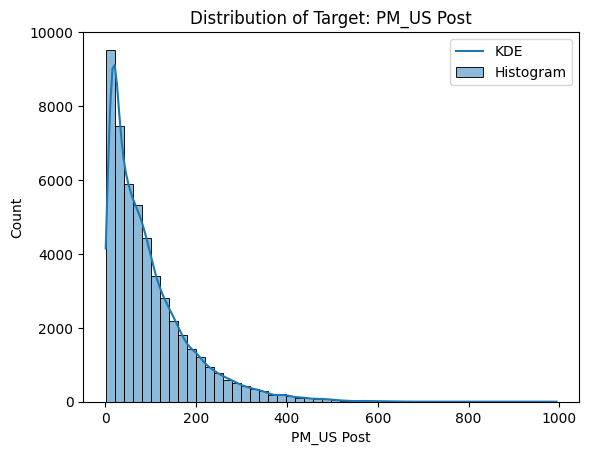

In [18]:

ax = sns.histplot(df['PM_US Post'], bins=50, kde=True, label='Histogram')
plt.title("Distribution of Target: PM_US Post")


if ax.get_lines():
    ax.get_lines()[0].set_label('KDE')

plt.legend()
plt.show()


This shows the distribution of target column, as we can see its a bit right skewed

<h1>Correlation Heatmap</h1>

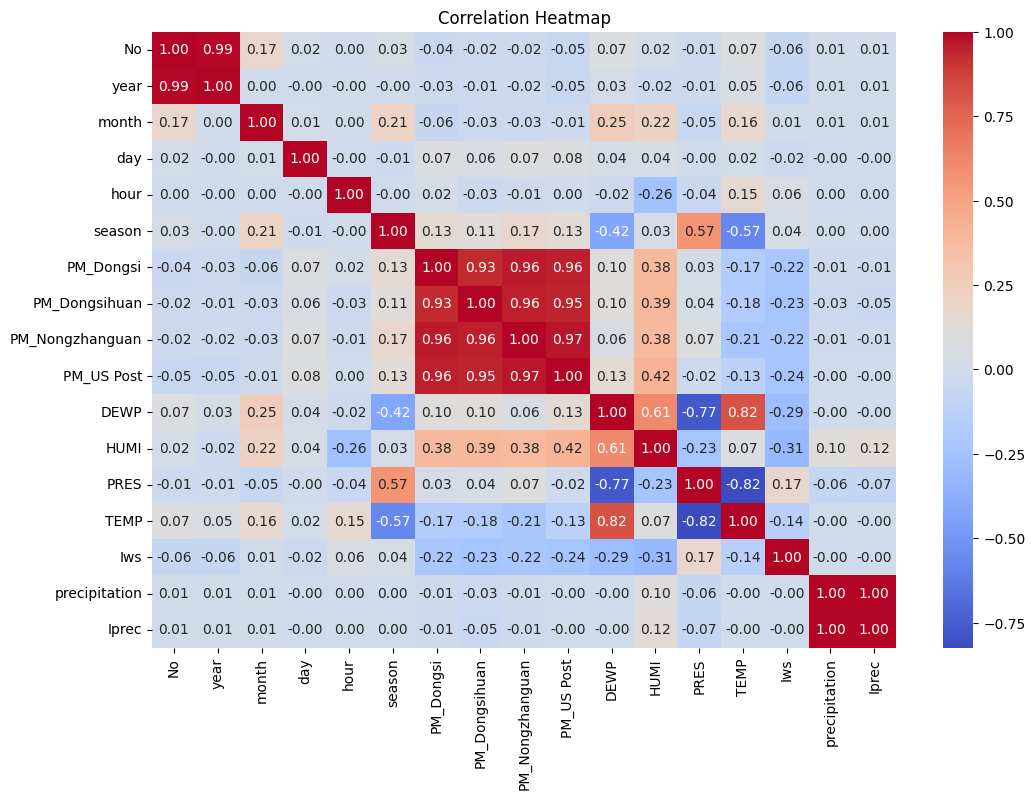

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



This heatmap shows how different variables in the air quality dataset are related. The colors indicate correlation: red means strong positive correlation, blue means strong negative, and grey means little or no relationship. We can see that the PM2.5 readings from different stations are very closely linked, meaning pollution spikes in one area usually happen across the city. Temperature and pressure have a strong negative relationship, while temperature and dew point rise together. Seasonal patterns also affect these variables, with colder months showing higher pressure and lower temperatures. Some columns, like “No” and “year,” are almost identical, which could be dropped to simplify models. Overall, this heatmap helps identify which variables are strongly connected and which ones might be redundant, making it easier to prepare the data for analysis or modeling.

<h1>Pairwise Relationships / Scatterplots</h1>

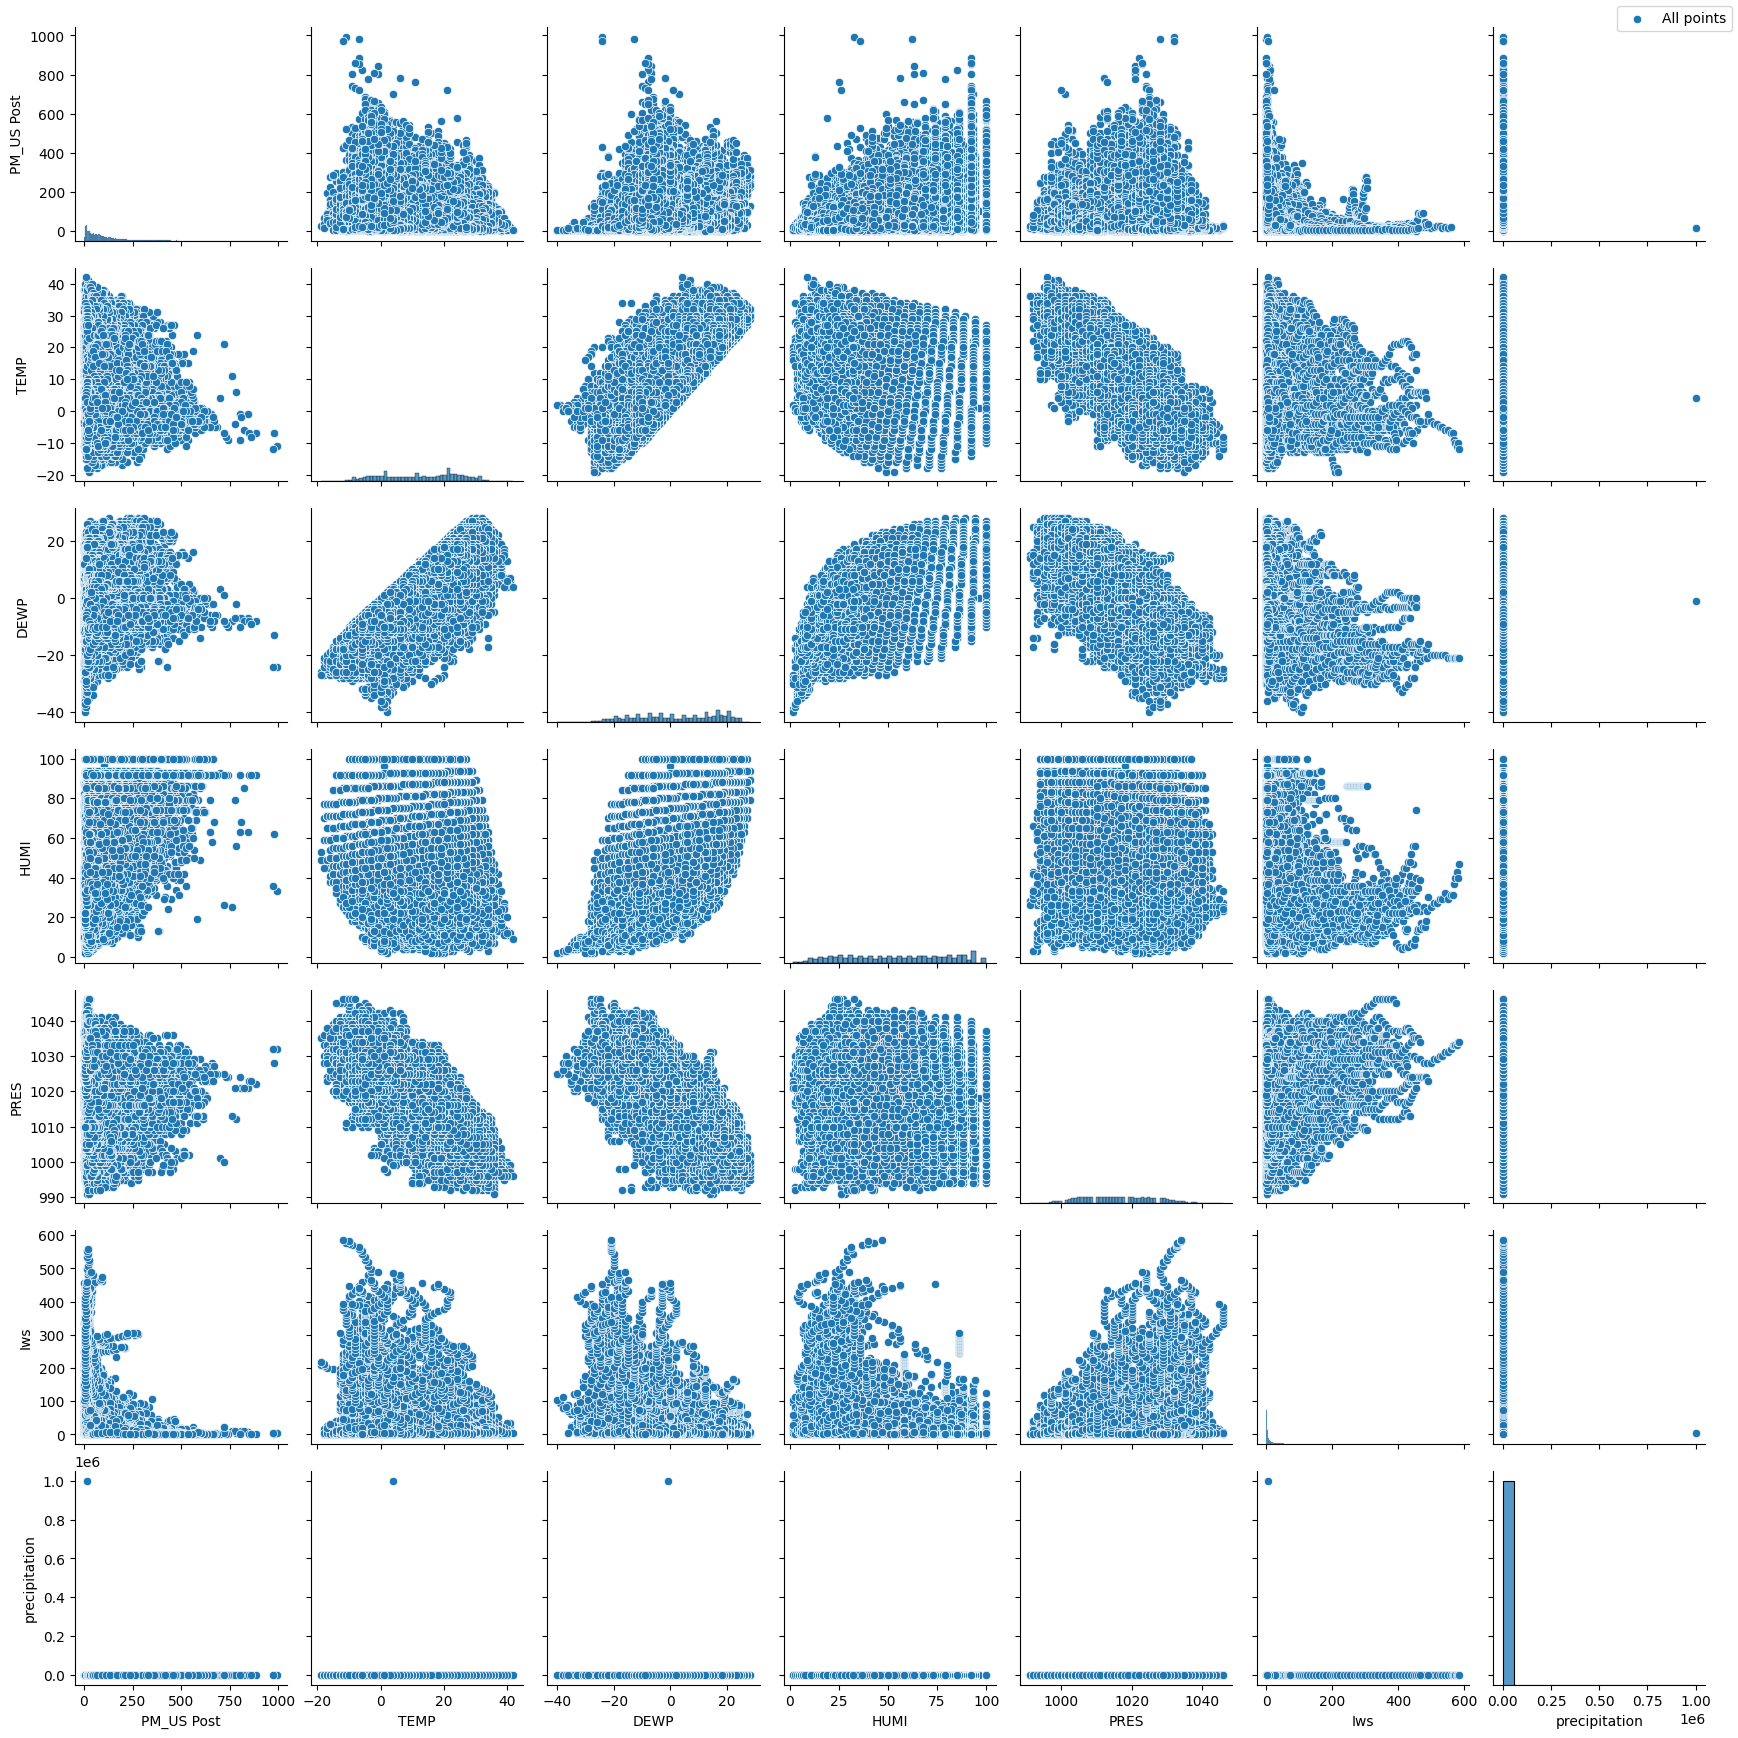

In [20]:

g = sns.pairplot(df[['PM_US Post','TEMP','DEWP','HUMI','PRES','Iws','precipitation']])

plt.figlegend(['All points'], loc='upper right', frameon=True)

plt.show()



The pair plot provides a clear way to explore how different variables in the dataset relate to one another. This dataset appears to track air quality and weather, focusing on PM2.5 levels, temperature, humidity, and pressure. Along the diagonal, we can see the distribution of each variable, while the off-diagonal squares show scatterplots comparing every pair of variables. One noticeable pattern is a strong positive correlation between temperature and dew point, meaning that as one rises, the other usually does too. In contrast, temperature and dew point both tend to decrease as atmospheric pressure increases, which is a common meteorological pattern. Looking at PM2.5 levels, higher pollution sometimes coincides with higher pressures, likely during stagnant air conditions, while stronger winds are associated with lower PM levels because the air gets dispersed. Precipitation data appears sparse, indicating either few rainy days or a heavy skew toward dry conditions. Overall, the pair plot highlights both clear relationships and areas where the data is limited.

<h1>Categorical Feature Analysis</h1>

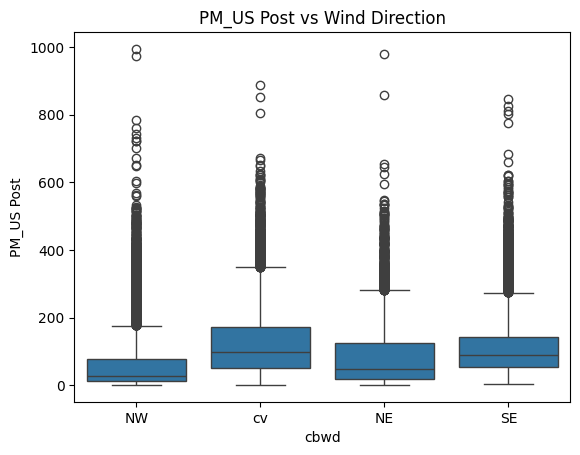

In [21]:
sns.boxplot(x='cbwd', y='PM_US Post', data=df)
plt.title("PM_US Post vs Wind Direction")
plt.show()


The boxplot shows how PM2.5 levels vary depending on wind direction, giving a sense of where pollution might be coming from. Looking at the data, calm or variable winds (“cv”) are associated with the highest typical pollution, with a median around 100. This makes sense because when the air isn’t moving, pollutants just build up rather than being dispersed. On the other end, winds from the Northwest (NW) bring the cleanest air, with median levels around 25, suggesting that this direction likely carries relatively unpolluted air to the area. Winds from the Northeast (NE) and Southeast (SE) fall in between, showing higher pollution than NW but lower than calm conditions. One striking feature is that every wind category has extreme spikes, with outliers reaching 800–1000. This shows that, while wind direction strongly influences average pollution, severe pollution events can occur no matter which way the wind blows. Overall, the plot highlights how stagnant conditions worsen air quality, NW winds improve it, and other directions sit somewhere in the middle.

<h1>Time Based Patterns</h1>

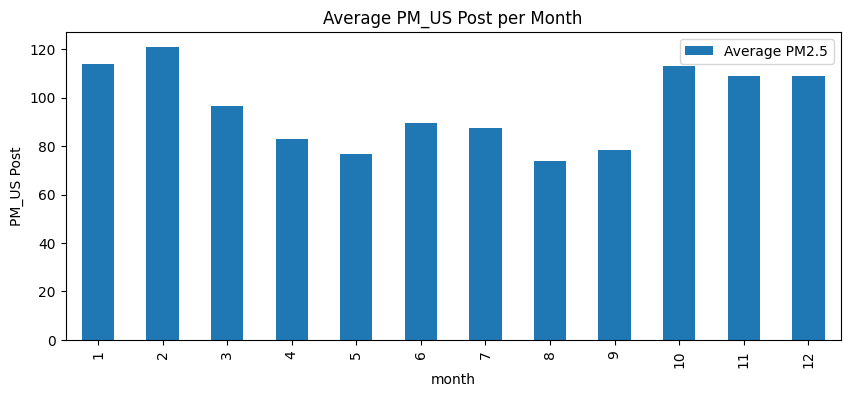

In [22]:
monthly_avg = df.groupby('month')['PM_US Post'].mean()
monthly_avg.plot(kind='bar', figsize=(10,4), label='Average PM2.5')
plt.title("Average PM_US Post per Month")
plt.ylabel("PM_US Post")
plt.legend()
plt.show()



The bar chart shows how average PM2.5 levels fluctuate throughout the year, giving a clear picture of seasonal air quality trends. Pollution peaks in February, reaching just over 120 units, and there’s another noticeable spike in October during late autumn. On the other hand, the air seems cleanest in May and August, when levels dip below 80 units. Generally, winter and early spring (December to February) have consistently high PM2.5 levels, likely due to factors like temperature inversions, increased heating, and stagnant air. Summer months (May to August) see much lower levels, although June shows a small rise. The late autumn spike in October may be linked to local events such as agricultural burning or the early arrival of winter. Overall, these seasonal patterns suggest that both weather conditions and human activities play a big role in air quality throughout the year.


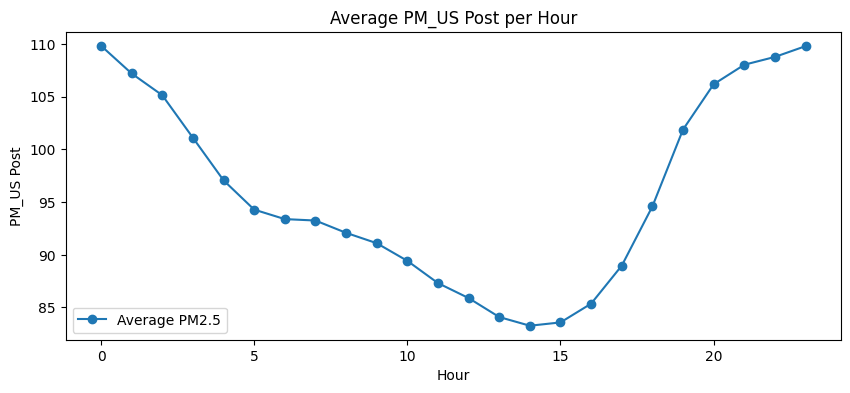

In [23]:
hourly_avg = df.groupby('hour')['PM_US Post'].mean()
hourly_avg.plot(kind='line', figsize=(10,4), marker='o', label='Average PM2.5')
plt.title("Average PM_US Post per Hour")
plt.xlabel("Hour")
plt.ylabel("PM_US Post")
plt.legend()
plt.show()



The line chart shows average PM2.5 levels over a 24-hour period, revealing a clear daily pattern in air pollution. Levels are highest around midnight to early morning (hours 0–3) and again in the late evening (hours 20–23), peaking near 110. This happens because cooler night air stays close to the ground, trapping pollutants instead of letting them disperse. During the day, from around 5 AM to 2 PM, levels steadily drop, hitting a low of about 83 around 2 PM. Sunlight warms the air, creating vertical currents that mix the atmosphere and dilute pollutants near the surface. After 4 PM, PM2.5 levels climb quickly, likely due to evening traffic and the cooling ground, which causes the boundary layer to shrink and trap pollutants closer to the surface again. Overall, this chart highlights a predictable daily rhythm in air quality, driven by a mix of meteorology and human activity.

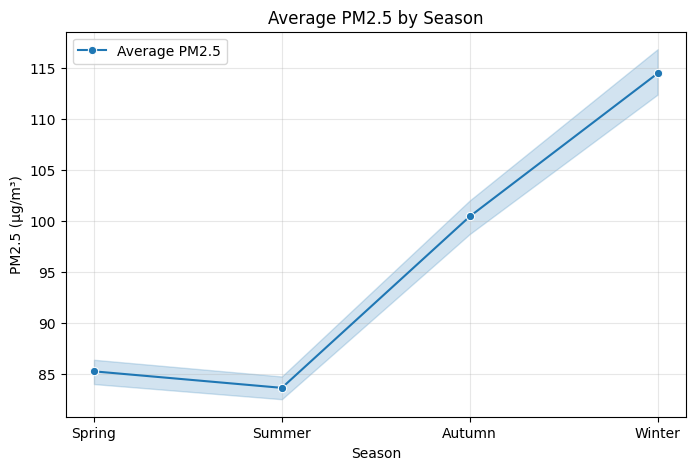

In [24]:


plt.figure(figsize=(8, 5))

sns.lineplot(
    data=df, 
    x='season', 
    y='PM_US Post', 
    marker='o', 
    estimator='mean',
    label='Average PM2.5'   
)

plt.title('Average PM2.5 by Season')
plt.ylabel('PM2.5 (μg/m³)')
plt.xlabel('Season')
plt.xticks([1, 2, 3, 4], ['Spring', 'Summer', 'Autumn', 'Winter'])

plt.grid(True, alpha=0.3)
plt.legend()  
plt.show()


The chart shows how PM2.5 levels change with the seasons, revealing a clear rise in air pollution from summer through winter. Air quality is at its best during the summer, with levels around 83 to 84 μg/m³, and slightly higher in spring at about 85 μg/m³. In autumn, pollution climbs sharply to roughly 100 μg/m³, before peaking in winter at nearly 115 μg/m³. This seasonal pattern is common in environmental science. During winter, temperature inversions trap cold air and pollutants near the ground, while increased heating using wood, coal, or gas adds even more particulates to the air. Overall, the data highlights that air is cleanest in summer, starts to worsen in autumn, and reaches its worst levels in winter, creating noticeable health and visibility concerns.

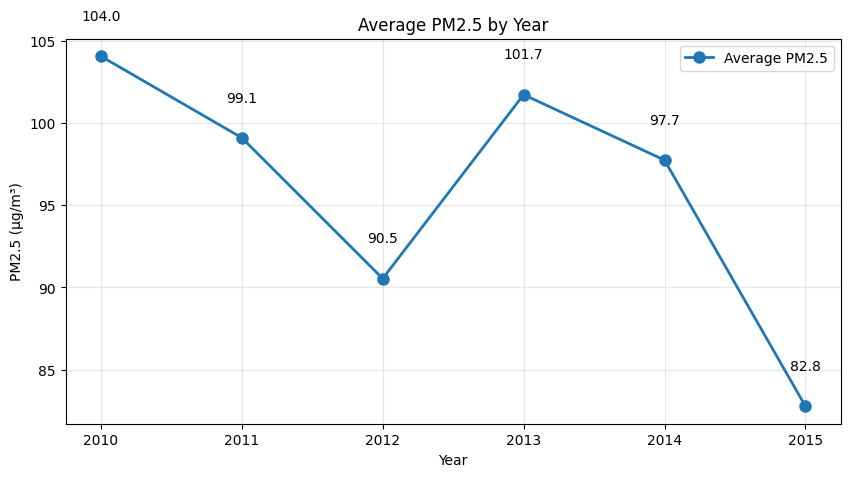

Yearly PM2.5 Averages:
2010: 104.0 μg/m³
2011: 99.1 μg/m³
2012: 90.5 μg/m³
2013: 101.7 μg/m³
2014: 97.7 μg/m³
2015: 82.8 μg/m³


In [25]:

plt.figure(figsize=(10, 5))

yearly_avg = df.groupby('year')['PM_US Post'].mean()
plt.plot(
    yearly_avg.index, 
    yearly_avg.values, 
    marker='o', 
    linewidth=2, 
    markersize=8, 
    label='Average PM2.5'  
)

plt.title('Average PM2.5 by Year')
plt.ylabel('PM2.5 (μg/m³)')
plt.xlabel('Year')
plt.grid(True, alpha=0.3)


for year, value in yearly_avg.items():
    plt.text(year, value + 2, f'{value:.1f}', ha='center', va='bottom')

plt.legend()  
plt.show()

print("Yearly PM2.5 Averages:")
for year, value in yearly_avg.items():
    print(f"{year}: {value:.1f} μg/m³")


The line graph shows how average PM2.5 levels changed from 2010 to 2015. Overall, there’s a clear downward trend: levels started at a high of 104.0 in 2010 and dropped to 82.8 by 2015. The decline wasn’t completely steady, though. Between 2010 and 2012, air quality improved gradually, but in 2013 there was a sharp jump in pollution, with concentrations spiking to 101.7. After that, levels fell again through 2014 and 2015. This mid-period setback might have been linked to the Chinese government introducing stricter air-cleaning policies around 2013, especially targeting Beijing. Even with that spike, the overall trend suggests meaningful progress in reducing fine particulate matter over these six years.

<h1>Handling Missing Values</h1>

<h2>Dropping Unnecessary Columns</h2>

In [26]:
pm_columns_to_drop = ['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan','No']
df = df.drop(columns=pm_columns_to_drop)

In [27]:
df.shape

(52584, 14)

In [28]:

df.head()


,year,month,day,hour,season,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010,1,1,1,4,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010,1,1,2,4,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010,1,1,3,4,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010,1,1,4,4,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0


<h2> Checking if the missing values for PM_US Post are random</h2>

Missing at start: 23
Missing at end: 0
Total missing: 2197


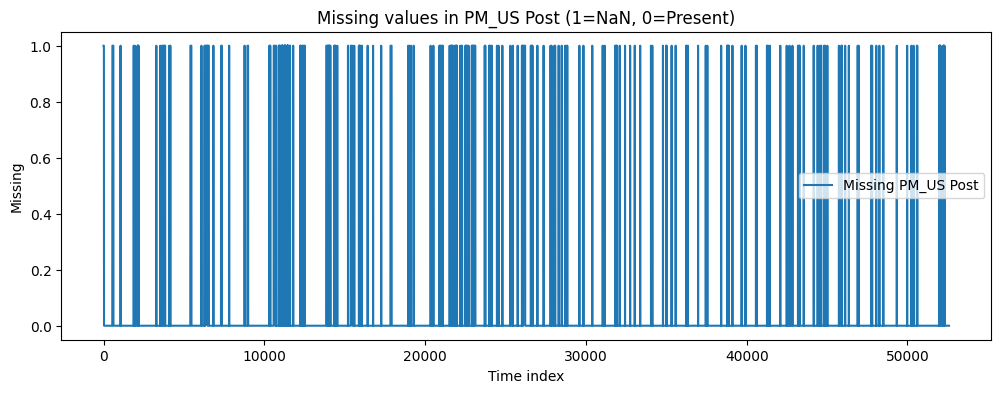

In [29]:
import matplotlib.pyplot as plt

missing = df['PM_US Post'].isna()

print("Missing at start:", missing[:50].sum())  

print("Missing at end:", missing[-50:].sum()) 

print("Total missing:", missing.sum())

plt.figure(figsize=(12,4))
plt.plot(missing.astype(int), label='Missing PM_US Post') 
plt.title("Missing values in PM_US Post (1=NaN, 0=Present)")
plt.xlabel("Time index")
plt.ylabel("Missing")
plt.legend()  
plt.show()


Looking at the plot, we can see a solid line along the bottom showing that the sensor worked most of the time. Here and there, random spikes shoot up, showing missing readings scattered across the timeline. A few small clusters stand out, but they’re rare compared with all the data that’s present. Overall, the gaps are short and unpredictable, so using interpolation to fill them in would probably give a good estimate without distorting the trends.

<h2>Interpolating target column PM_US Post</h2>

In [30]:

missing_before = df['PM_US Post'].isna().sum()
print("Missing values before filling:", missing_before)

pm_before = df['PM_US Post'].copy()

# Interpolation + forward fill + backward fill
df['PM_US Post'] = df['PM_US Post'].interpolate(method='linear')
df['PM_US Post'] = df['PM_US Post'].ffill()
df['PM_US Post'] = df['PM_US Post'].bfill()

filled_rows = pd.DataFrame({
    'Original (NaN)': pm_before[pm_before.isna()],
    'Filled': df['PM_US Post'][pm_before.isna()]
})
print("Rows where PM_US Post was interpolated/filled:")
print(filled_rows)

missing_after = df['PM_US Post'].isna().sum()
print("Missing values after interpolation and fill:", missing_after)


Missing values before filling: 2197
Rows where PM_US Post was interpolated/filled:
       Original (NaN)  Filled
0                 NaN  129.00
1                 NaN  129.00
2                 NaN  129.00
3                 NaN  129.00
4                 NaN  129.00
...               ...     ...
52289             NaN  166.00
52290             NaN  172.75
52291             NaN  179.50
52292             NaN  186.25
52294             NaN  214.50

[2197 rows x 2 columns]
Missing values after interpolation and fill: 0


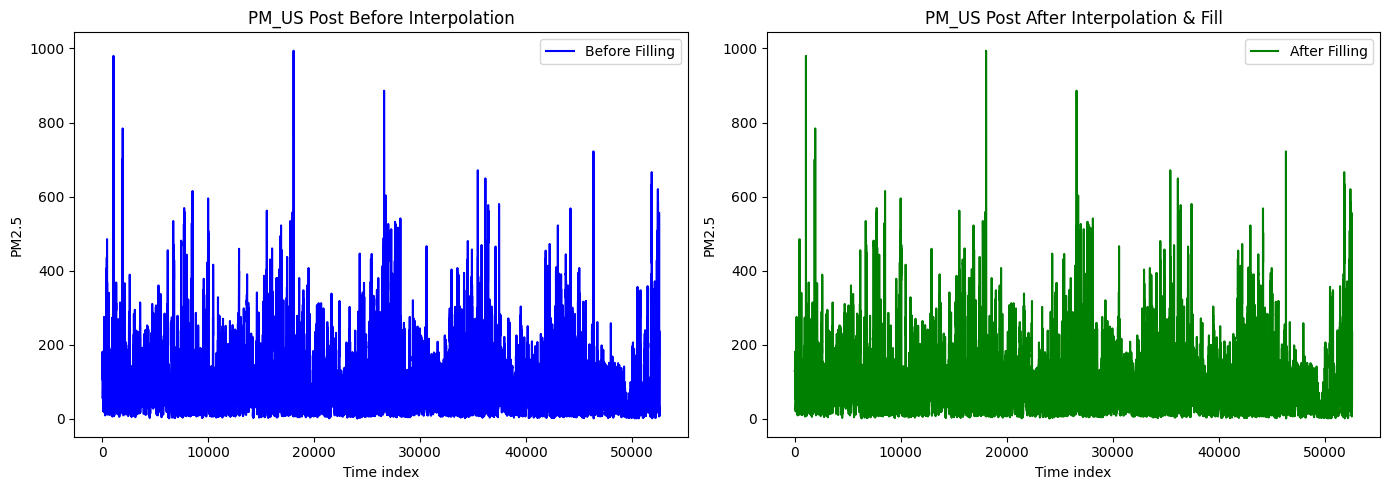

In [31]:


pm_before = df['PM_US Post'].copy()

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(pm_before, color='blue', label='Before Filling')
plt.title('PM_US Post Before Interpolation')
plt.xlabel('Time index')
plt.ylabel('PM2.5')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df['PM_US Post'], color='green', label='After Filling')
plt.title('PM_US Post After Interpolation & Fill')
plt.xlabel('Time index')
plt.ylabel('PM2.5')
plt.legend()

plt.tight_layout()
plt.show()



The left plot shows the raw PM2.5 data before any cleaning. We can see lots of white gaps between the blue lines, representing periods where the sensor didn’t record anything. The data is also quite noisy, with sharp spikes that likely correspond to high pollution events, but the missing chunks make it harder for a model to learn the patterns over time. The right plot shows the data after interpolation and filling. All the gaps have been smoothed out, so the green line now has a continuous value for every time point. Short missing sections were estimated using interpolation, while any remaining gaps at the start or end were filled using forward or backfilling. This step is important because most models can’t handle missing values, and having a continuous dataset helps the model capture trends and seasonality. 

<h2>Train test split</h2>

In [32]:
target_col = 'PM_US Post'
X = df.drop(columns=[target_col])
y = df[target_col]

# For time series: Split by ORDER 
split_point = int(len(X) * 0.8)  # 80% train, 20% test

X_train = X.iloc[:split_point].copy()
X_test = X.iloc[split_point:].copy()
y_train = y.iloc[:split_point].copy()
y_test = y.iloc[split_point:].copy()

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nTrain date range:", df.index[:split_point][0], "to", df.index[:split_point][-1])
print("Test date range:", df.index[split_point:][0], "to", df.index[split_point:][-1])

print("Train missing:", y_train.isna().sum())
print("Test missing:", y_test.isna().sum())

X_train shape: (42067, 13)
X_test shape: (10517, 13)
y_train shape: (42067,)
y_test shape: (10517,)

Train date range: 0 to 42066
Test date range: 42067 to 52583
Train missing: 0
Test missing: 0


<h2>Checking the distribution of input columns</h2>

DEWP - Missing at start: 0, Missing at end: 0, Total missing: 5


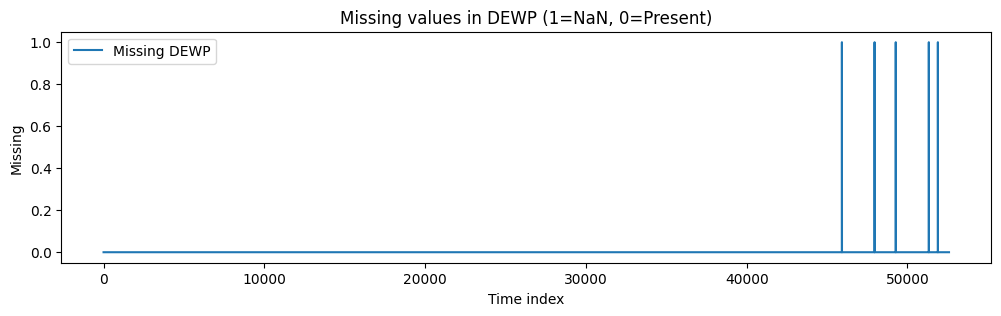

HUMI - Missing at start: 0, Missing at end: 0, Total missing: 339


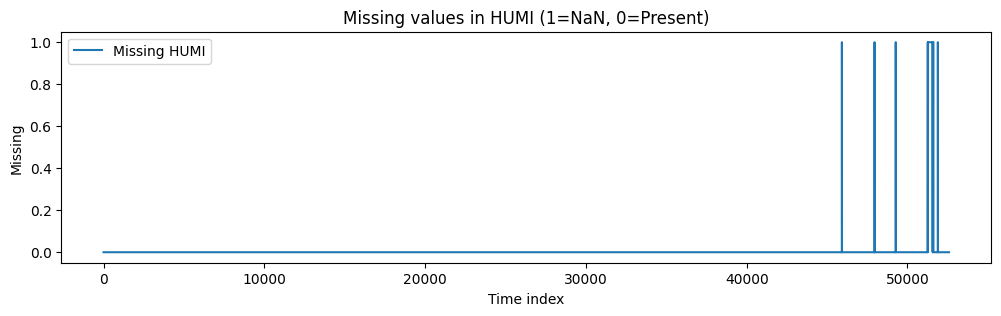

PRES - Missing at start: 0, Missing at end: 0, Total missing: 339


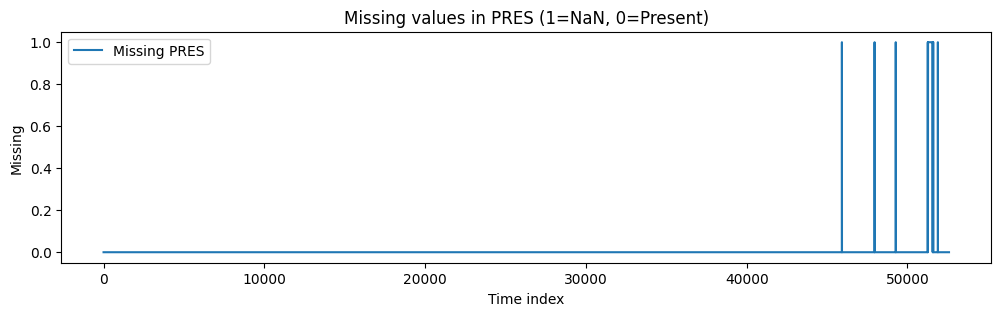

TEMP - Missing at start: 0, Missing at end: 0, Total missing: 5


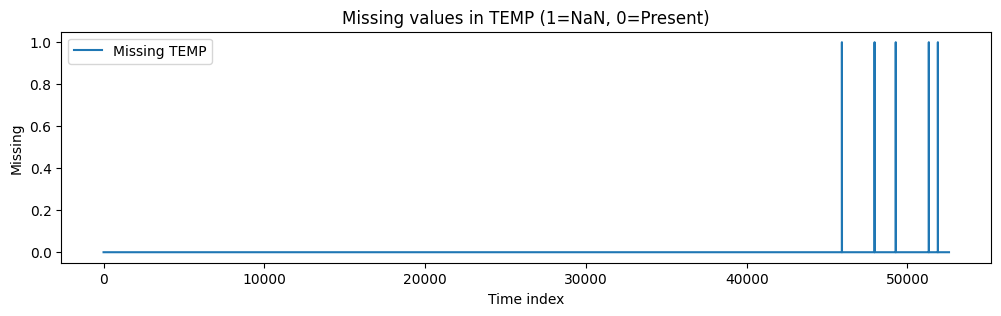

Iws - Missing at start: 0, Missing at end: 0, Total missing: 5


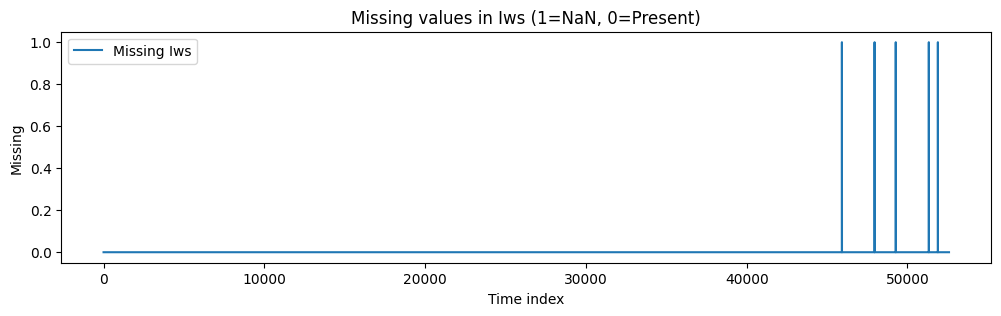

Iprec - Missing at start: 0, Missing at end: 0, Total missing: 484


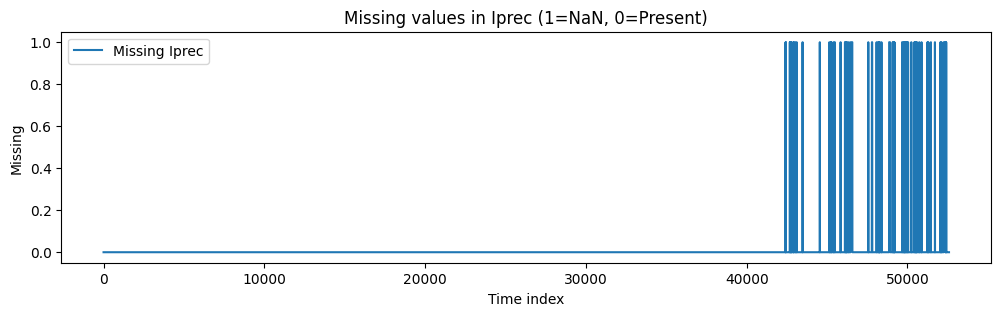

cbwd - Missing at start: 0, Missing at end: 0, Total missing: 5


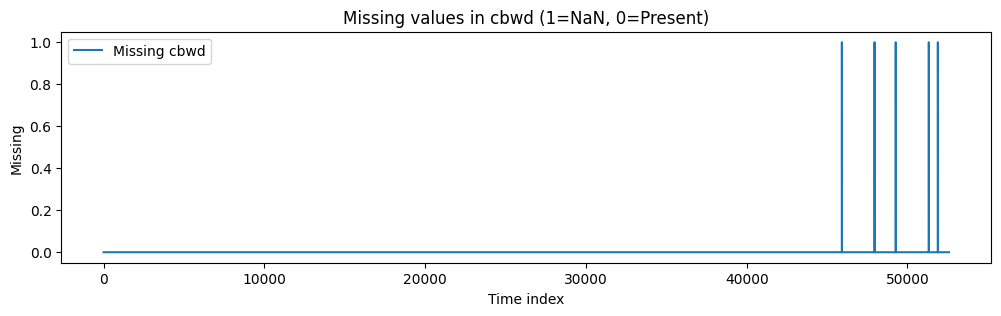

precipitation - Missing at start: 0, Missing at end: 0, Total missing: 484


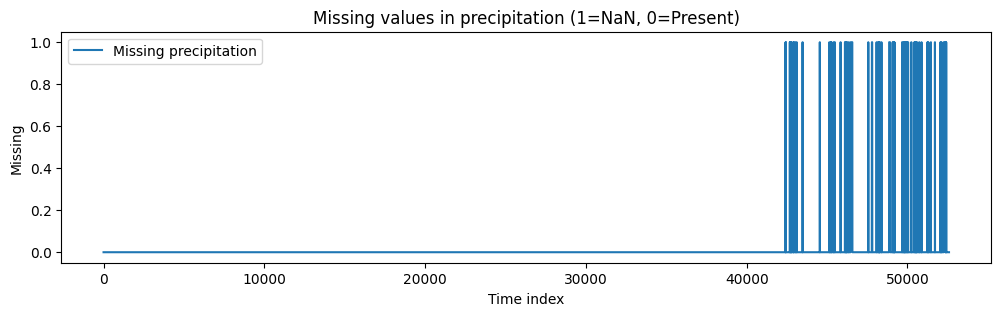

In [33]:
weather_cols = ['DEWP', 'HUMI', 'PRES', 'TEMP','Iws', 'Iprec','cbwd','precipitation']

for col in weather_cols:
    missing = df[col].isna()
    print(f"{col} - Missing at start: {missing[:50].sum()}, Missing at end: {missing[-50:].sum()}, Total missing: {missing.sum()}")

    plt.figure(figsize=(12,3))
    plt.plot(missing.astype(int), label=f'Missing {col}') 
    plt.title(f"Missing values in {col} (1=NaN, 0=Present)")
    plt.xlabel("Time index")
    plt.ylabel("Missing")
    plt.legend()  
    plt.show()



We can see a Missing Value Analysis for the time-series dataset. The plots show where data is present (0) and missing (1) across the timeline for variables like DEWP, HUMI, PRES, TEMP, Iws, and cbwd. Most of the dataset is complete for the first 45,000 time points, but after that, we notice vertical spikes where large chunks of data are missing across multiple sensors at the same time. This suggests a system-wide issue, like the data logger losing power or the station going offline, rather than a problem with any single sensor. Overall, the missingness isn’t random and tends to affect several variables simultaneously.

In [34]:
weather_cols = ['DEWP', 'HUMI', 'PRES', 'TEMP','precipitation']

for col in weather_cols:
    original_train = X_train[col].copy()

    #  Linear interpolation + ffill + bfill for TRAIN
    X_train[col] = X_train[col].interpolate(method='linear')
    X_train[col] = X_train[col].ffill()
    X_train[col] = X_train[col].bfill()

    filled_rows_train = pd.DataFrame({
        'Original (NaN)': original_train[original_train.isna()],
        'Filled': X_train[col][original_train.isna()]
    })
    print(f"TRAIN - Rows filled for {col}:")
    print(filled_rows_train)
    print(f"TRAIN - Missing values after filling {col}: {X_train[col].isna().sum()}\n")

    original_test = X_test[col].copy()

    X_test[col] = X_test[col].interpolate(method='linear')
    X_test[col] = X_test[col].ffill()
    X_test[col] = X_test[col].bfill()

    filled_rows_test = pd.DataFrame({
        'Original (NaN)': original_test[original_test.isna()],
        'Filled': X_test[col][original_test.isna()]
    })
    print(f"TEST - Rows filled for {col}:")
    print(filled_rows_test)
    print(f"TEST - Missing values after filling {col}: {X_test[col].isna().sum()}\n")

TRAIN - Rows filled for DEWP:
Empty DataFrame
Columns: [Original (NaN), Filled]
Index: []
TRAIN - Missing values after filling DEWP: 0

TEST - Rows filled for DEWP:
       Original (NaN)  Filled
45922             NaN     4.0
47954             NaN    15.5
49271             NaN    18.0
51328             NaN     3.0
51891             NaN   -13.0
TEST - Missing values after filling DEWP: 0

TRAIN - Rows filled for HUMI:
Empty DataFrame
Columns: [Original (NaN), Filled]
Index: []
TRAIN - Missing values after filling HUMI: 0

TEST - Rows filled for HUMI:
       Original (NaN)  Filled
45922             NaN    44.0
47954             NaN    66.0
49271             NaN    69.0
51257             NaN    93.0
51258             NaN    93.0
...               ...     ...
51605             NaN   100.0
51606             NaN   100.0
51607             NaN   100.0
51608             NaN   100.0
51891             NaN    40.5

[339 rows x 2 columns]
TEST - Missing values after filling HUMI: 0

TRAIN - Rows fil

 since Iws and Iprec are cumulative we are going to use forward fill for them

In [35]:
#Filling cumulative columns

cum_cols = ['Iws', 'Iprec']

for col in cum_cols:
    original_train = X_train[col].copy()
    X_train[col] = X_train[col].ffill().bfill()

    print(f"TRAIN - Rows filled for {col}:")
    train_filled = pd.DataFrame({
        'Original (NaN)': original_train[original_train.isna()],
        'Filled': X_train[col][original_train.isna()]
    })
    print(train_filled)
    print(f"TRAIN - Missing values after filling {col}: {X_train[col].isna().sum()}\n")

    original_test = X_test[col].copy()
    X_test[col] = X_test[col].ffill().bfill()

    print(f"TEST - Rows filled for {col}:")
    test_filled = pd.DataFrame({
        'Original (NaN)': original_test[original_test.isna()],
        'Filled': X_test[col][original_test.isna()]
    })
    print(test_filled)
    print(f"TEST - Missing values after filling {col}: {X_test[col].isna().sum()}\n")

TRAIN - Rows filled for Iws:
Empty DataFrame
Columns: [Original (NaN), Filled]
Index: []
TRAIN - Missing values after filling Iws: 0

TEST - Rows filled for Iws:
       Original (NaN)  Filled
45922             NaN    3.13
47954             NaN   30.85
49271             NaN    0.89
51328             NaN    1.78
51891             NaN  193.11
TEST - Missing values after filling Iws: 0

TRAIN - Rows filled for Iprec:
Empty DataFrame
Columns: [Original (NaN), Filled]
Index: []
TRAIN - Missing values after filling Iprec: 0

TEST - Rows filled for Iprec:
       Original (NaN)  Filled
42424             NaN     0.0
42437             NaN     0.0
42684             NaN     0.0
42708             NaN     0.0
42756             NaN     0.0
...               ...     ...
52340             NaN     0.0
52341             NaN     0.0
52342             NaN     0.0
52373             NaN     0.0
52408             NaN     0.0

[484 rows x 2 columns]
TEST - Missing values after filling Iprec: 0



In [36]:
# compute group-wise mode 

cbwd_mode = (
    X_train
    .groupby(['season', 'hour'])['cbwd']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

def fill_cbwd(row):
    if pd.isna(row['cbwd']):
        return cbwd_mode.loc[(row['season'], row['hour'])]
    return row['cbwd']

X_train['cbwd'] = X_train.apply(fill_cbwd, axis=1)
X_test['cbwd']  = X_test.apply(fill_cbwd, axis=1)

X_train['cbwd'] = X_train['cbwd'].fillna(X_train['cbwd'].mode()[0])
X_test['cbwd']  = X_test['cbwd'].fillna(X_train['cbwd'].mode()[0])


Missing wind direction values were imputed using the most frequent direction within the same season and hour to preserve temporal and seasonal consistency.

In [37]:
X_train.head(30)

,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,2010,1,1,0,4,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2010,1,1,1,4,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,2010,1,1,2,4,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,2010,1,1,3,4,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,2010,1,1,4,4,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
5,2010,1,1,5,4,-19.0,47.0,1017.0,-10.0,NW,16.10,0.0,0.0
6,2010,1,1,6,4,-19.0,44.0,1017.0,-9.0,NW,19.23,0.0,0.0
7,2010,1,1,7,4,-19.0,44.0,1017.0,-9.0,NW,21.02,0.0,0.0
8,2010,1,1,8,4,-19.0,44.0,1017.0,-9.0,NW,24.15,0.0,0.0
9,2010,1,1,9,4,-20.0,37.0,1017.0,-8.0,NW,27.28,0.0,0.0


<h2>Scaling data according to the distribution</h2>

Out Target column was heavily right skewed so we will transform it using log1p

In [38]:
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)


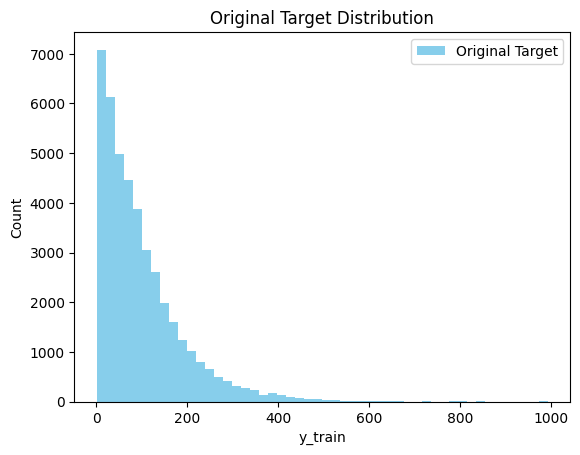

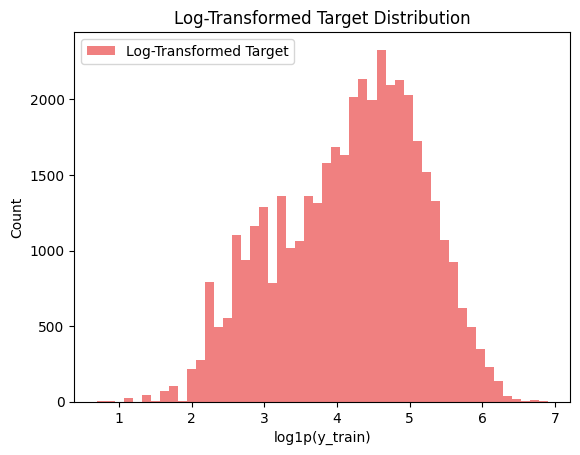

In [39]:

plt.hist(y_train, bins=50, color='skyblue', label='Original Target')  # <-- add label
plt.title("Original Target Distribution")
plt.xlabel("y_train")
plt.ylabel("Count")
plt.legend()  
plt.show()


plt.hist(np.log1p(y_train), bins=50, color='lightcoral', label='Log-Transformed Target')  # <-- add label
plt.title("Log-Transformed Target Distribution")
plt.xlabel("log1p(y_train)")
plt.ylabel("Count")
plt.legend() 
plt.show()


The image shows "before and after" of a log transformation applied to skewed data. The top histogram (blue) shows the original data, which is heavily right-skewed: most values are low, but there’s a long tail stretching out to very high numbers. This kind of distribution can make models sensitive to outliers and distort patterns in the main bulk of the data. In the bottom histogram (red), we see the result after applying a log1p transformation. The data is now much more symmetrical, closer to a normal distribution, and the large values are compressed while smaller values are stretched. This makes it easier for models to learn patterns, stabilizes variance, and ensures extreme values don’t dominate. Using log1p also avoids issues with zeros, since we can’t take the log of zero directly. 

In [40]:


X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

for df in [X_train_processed, X_test_processed]:
    # Day of Year
    temp_dates = pd.to_datetime(df[['year', 'month', 'day']])
    day_of_year = temp_dates.dt.dayofyear
    days_in_year = np.where(temp_dates.dt.is_leap_year, 366, 365)

    df['day_of_year_sin'] = np.sin(2 * np.pi * day_of_year / days_in_year)
    df['day_of_year_cos'] = np.cos(2 * np.pi * day_of_year / days_in_year)

    # Hour
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)

    # Season (as categorical, not cyclical)

skewed_cols = [ 'Iws', 'precipitation', 'Iprec']
normal_cols = ['TEMP', 'PRES','DEWP', 'HUMI']
categorical_cols = ['cbwd', 'season'] 
cyclical_cols = ['day_of_year_sin', 'day_of_year_cos',
                 'hour_sin', 'hour_cos']
# year, month, day, hour are replaced by cyclical features

drop_cols = ['year', 'month', 'day', 'hour']  

preprocessor = ColumnTransformer(
    transformers=[
        ('skew', PowerTransformer(method='yeo-johnson'), skewed_cols),
        ('std', StandardScaler(), normal_cols),
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),

    ],
    remainder='passthrough'  
)

# Remove redundant columns before fitting
X_train_final_input = X_train_processed.drop(columns=drop_cols)
X_test_final_input = X_test_processed.drop(columns=drop_cols)

X_train_transformed = preprocessor.fit_transform(X_train_final_input)
X_test_transformed = preprocessor.transform(X_test_final_input)

feature_names = []
feature_names += skewed_cols
feature_names += normal_cols

cat_encoder = preprocessor.named_transformers_['cat']
feature_names += cat_encoder.get_feature_names_out(categorical_cols).tolist()

feature_names += cyclical_cols

#CREATING FINAL DATAFRAMES 
X_train_final = pd.DataFrame(X_train_transformed, columns=feature_names, index=X_train.index)
X_test_final = pd.DataFrame(X_test_transformed, columns=feature_names, index=X_test.index)

print("Features:", X_train_final.columns.tolist())
print("Shape:", X_train_final.shape)


Features: ['Iws', 'precipitation', 'Iprec', 'TEMP', 'PRES', 'DEWP', 'HUMI', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE', 'cbwd_cv', 'season_1', 'season_2', 'season_3', 'season_4', 'day_of_year_sin', 'day_of_year_cos', 'hour_sin', 'hour_cos']
Shape: (42067, 19)


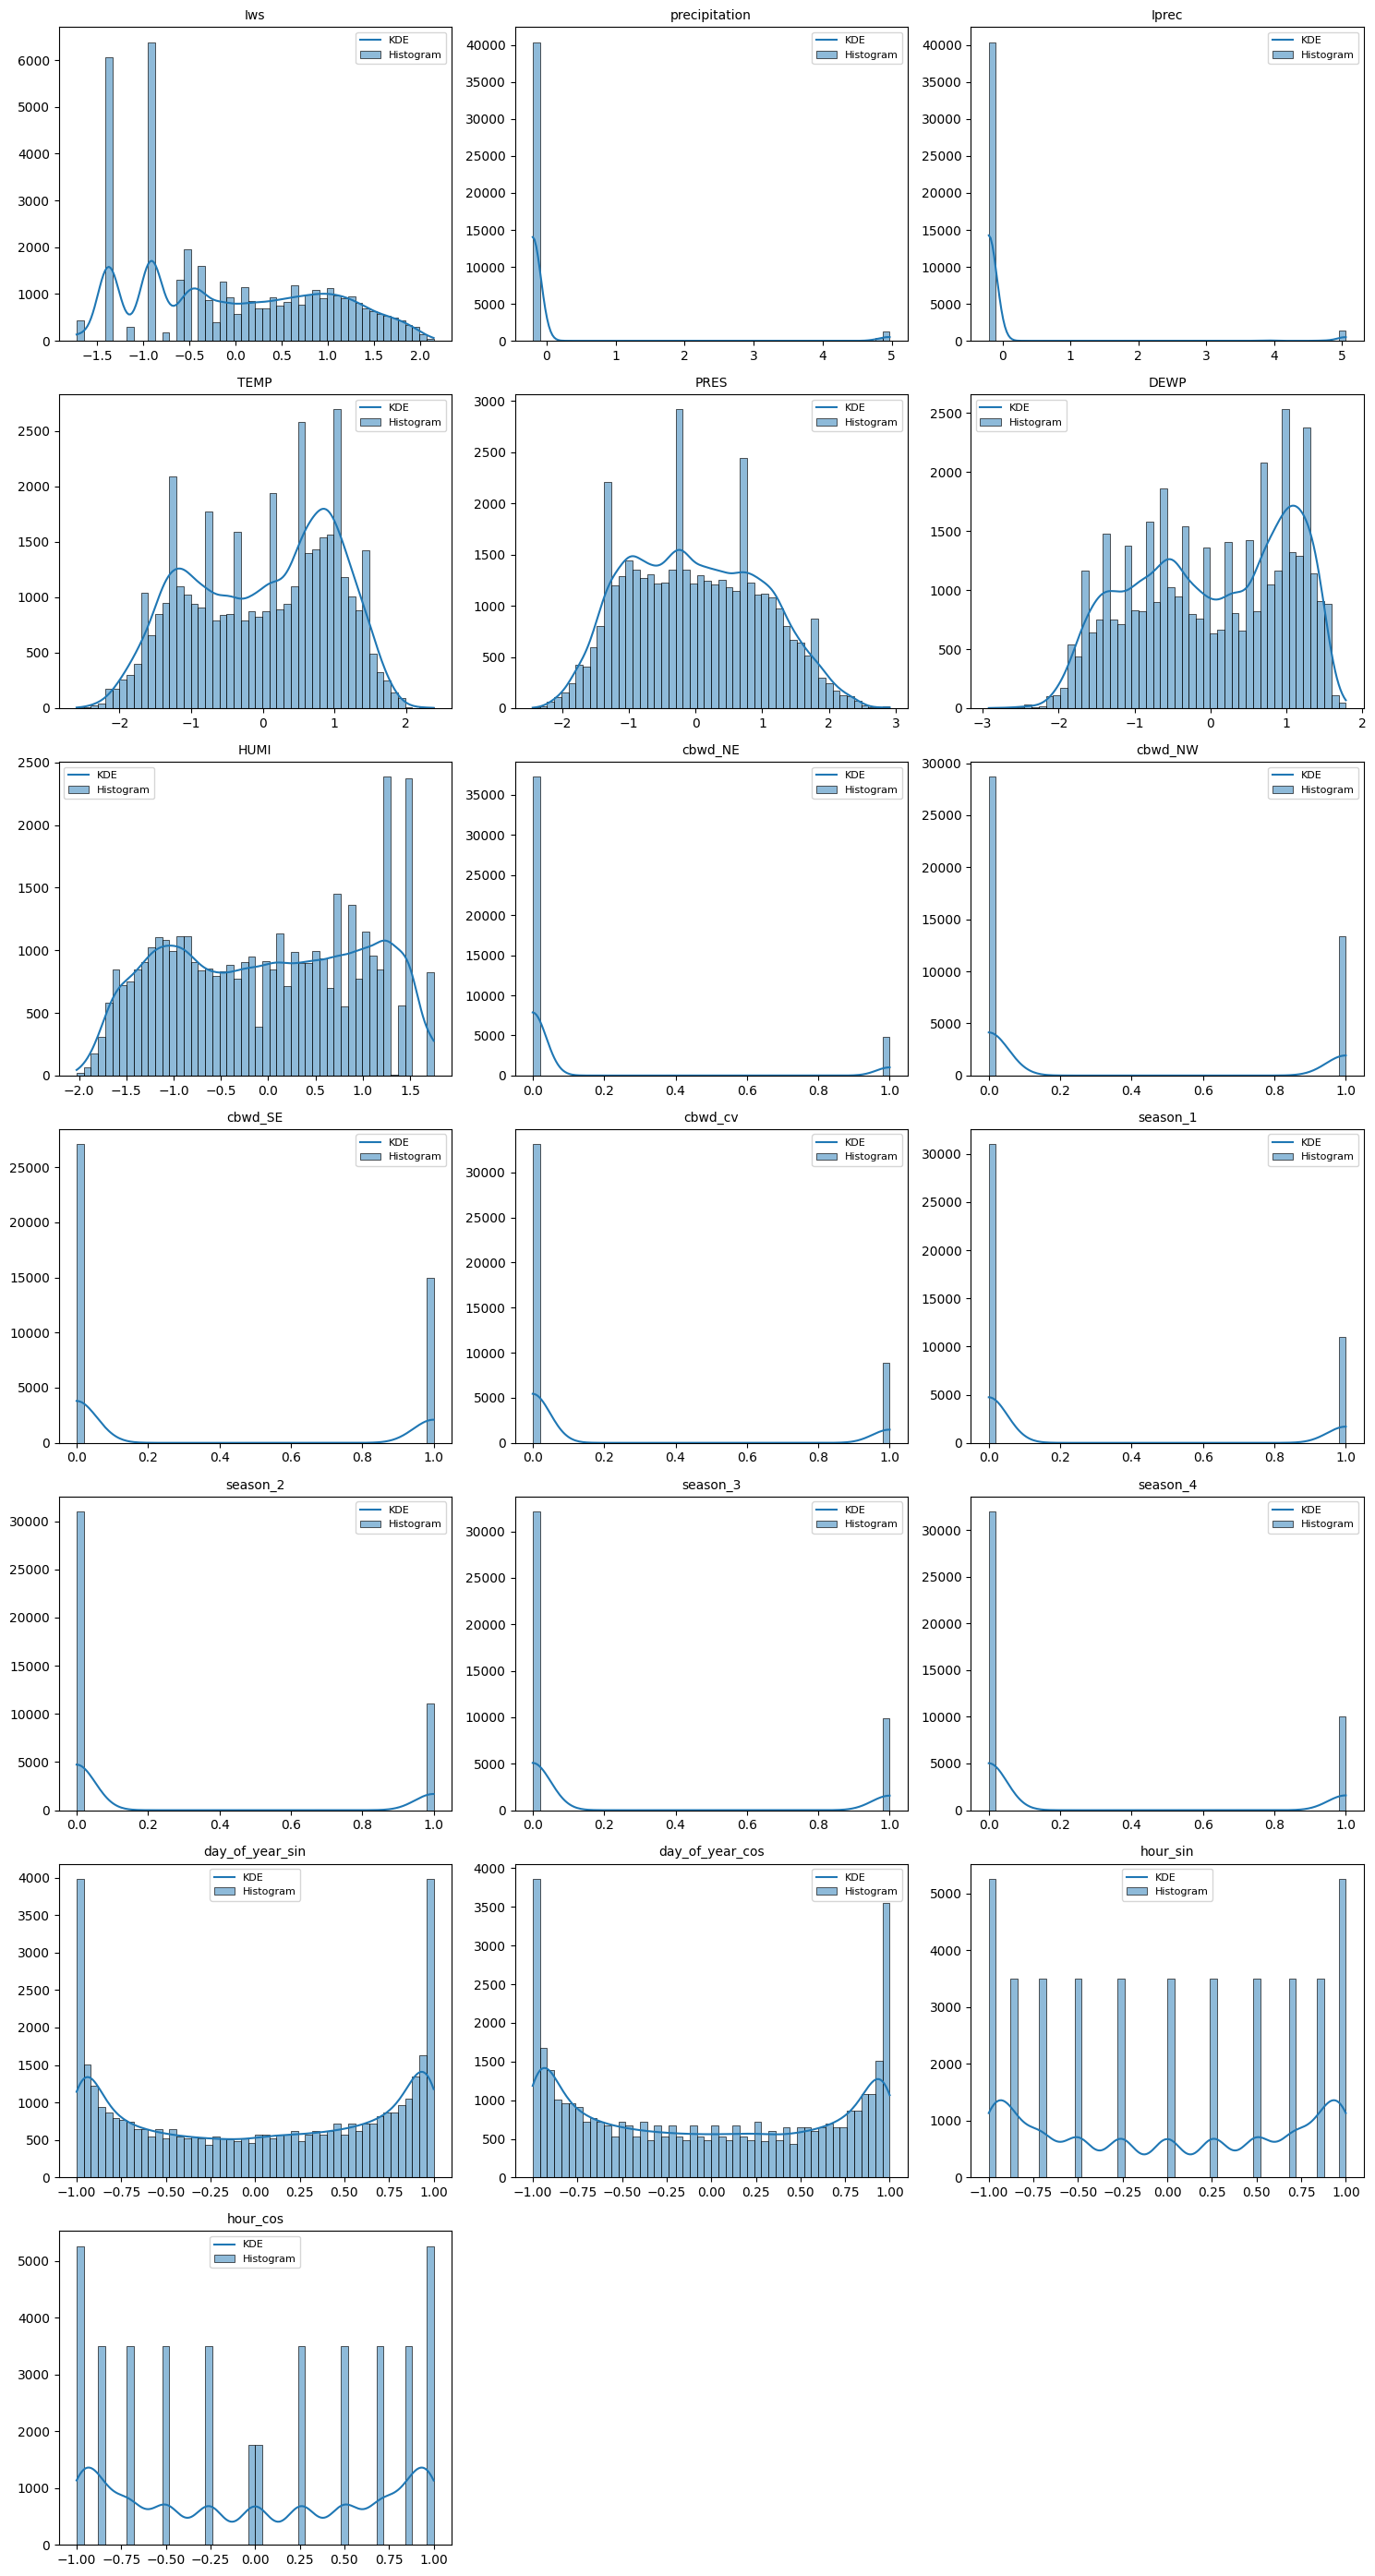

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


n_cols = 3

n_rows = (len(X_train_final.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(15, n_rows * 4))

for i, col in enumerate(X_train_final.columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    ax = sns.histplot(X_train_final[col], bins=50, kde=True, label='Histogram')

    if ax.get_lines():
        ax.get_lines()[0].set_label('KDE')
    
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(fontsize=8)

plt.tight_layout()
plt.show()


This image shows a set of histograms and KDE plots for a time-series dataset, likely the Beijing PM2.5 data or something similar, after normalization, scaling, and applying sine and cosine transformations to the time features. Looking at the distributions, precipitation is heavily skewed to the right, with most values at zero, while wind speed is also right-skewed but more spread out. Temperature, pressure, dew point, and humidity show roughly normal or multimodal distributions, reflecting seasonal changes, and their values range from about -2 to 2 due to standardization. Categorical features like wind direction and seasons are one-hot encoded, so their bars sit at 0 and 1. The cyclical time features, represented by sine and cosine transforms, form U-shapes or peaks at the edges, capturing the fact that hours or days wrap around so that hour 23 and hour 0 are close.

In [42]:
 X_train_final.head()

,Iws,precipitation,Iprec,TEMP,PRES,DEWP,HUMI,cbwd_NE,cbwd_NW,cbwd_SE,cbwd_cv,season_1,season_2,season_3,season_4,day_of_year_sin,day_of_year_cos,hour_sin,hour_cos
0,-0.911520,-0.202479,-0.202027,-1.945066,0.477309,-1.606231,-0.445974,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017213,0.999852,0.000000,1.000000
1,-0.150630,-0.202479,-0.202027,-2.026749,0.379939,-1.606231,-0.291839,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017213,0.999852,0.258819,0.965926
2,0.079563,-0.202479,-0.202027,-1.945066,0.282568,-1.606231,-0.445974,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017213,0.999852,0.500000,0.866025
3,0.351571,-0.202479,-0.202027,-2.190114,0.282568,-1.606231,0.016432,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017213,0.999852,0.707107,0.707107
4,0.537329,-0.202479,-0.202027,-2.026749,0.185198,-1.537087,-0.137704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.017213,0.999852,0.866025,0.500000


In [43]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42067 entries, 0 to 42066
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Iws              42067 non-null  float64
 1   precipitation    42067 non-null  float64
 2   Iprec            42067 non-null  float64
 3   TEMP             42067 non-null  float64
 4   PRES             42067 non-null  float64
 5   DEWP             42067 non-null  float64
 6   HUMI             42067 non-null  float64
 7   cbwd_NE          42067 non-null  float64
 8   cbwd_NW          42067 non-null  float64
 9   cbwd_SE          42067 non-null  float64
 10  cbwd_cv          42067 non-null  float64
 11  season_1         42067 non-null  float64
 12  season_2         42067 non-null  float64
 13  season_3         42067 non-null  float64
 14  season_4         42067 non-null  float64
 15  day_of_year_sin  42067 non-null  float64
 16  day_of_year_cos  42067 non-null  float64
 17  hour_sin    

<h1> Neural Network </h1>

In [44]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining Neural Network
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),  # two hidden layers
    activation='relu',
    solver='adam',
    max_iter=500,                
    early_stopping=True,          
    random_state=42
)


mlp.fit(X_train_final, y_train_log)


y_pred_log = mlp.predict(X_test_final)
y_pred = np.expm1(y_pred_log)  # convert back from log


rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred))
r2_mlp = r2_score(y_test, y_pred)

print(f"Neural Network (MLP) - RMSE: {rmse_mlp:.2f}, R²: {r2_mlp:.2f}")


Neural Network (MLP) - RMSE: 63.34, R²: 0.53


In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_final, y_train_log)

y_pred_log = rf.predict(X_test_final)
y_pred = np.expm1(y_pred_log)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Random Forest RMSE: {rmse:.2f}, R2: {r2:.2f}")


Random Forest RMSE: 62.77, R2: 0.54


In [46]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Defining Gradient Boosting
gb = HistGradientBoostingRegressor(
    max_iter=200,        
    max_depth=15,        
    learning_rate=0.1,   
    random_state=42
)


gb.fit(X_train_final, y_train_log)


y_pred_log = gb.predict(X_test_final)
y_pred = np.expm1(y_pred_log)  # convert back from log


rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gb = r2_score(y_test, y_pred)

print(f"Gradient Boosting - RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}")


Gradient Boosting - RMSE: 61.36, R²: 0.56


<h1>Random Forest Hyperparameter Tuning</h1>

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


rf = RandomForestRegressor(random_state=42, n_jobs=-1)

rf_params = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Randomized search
rf_cv = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_params,
    n_iter=20,              
    cv=3,                   # 3-fold CV
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)


rf_cv.fit(X_train_final, y_train_log)

print("Random Forest Best Params:", rf_cv.best_params_)
print("Random Forest Best CV R²:", rf_cv.best_score_)

y_pred_log = rf_cv.predict(X_test_final)
y_pred = np.expm1(y_pred_log)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)
print(f"Optimized Random Forest --> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Random Forest Best Params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 10}
Random Forest Best CV R²: 0.5424664891913816
Optimized Random Forest --> RMSE: 62.13, R²: 0.54


<h1>Gradient Boosting Hyperparameter Tuning</h1>

In [48]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gb = HistGradientBoostingRegressor(random_state=42)

gb_params = {
    'max_iter': [200, 300, 400],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_leaf': [20, 30, 40]
}

# Randomized search
gb_cv = RandomizedSearchCV(
    estimator=gb,
    param_distributions=gb_params,
    n_iter=20,
    cv=3,
    scoring='r2',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

gb_cv.fit(X_train_final, y_train_log)

print("Gradient Boosting Best Params:", gb_cv.best_params_)
print("Gradient Boosting Best CV R²:", gb_cv.best_score_)

y_pred_log = gb_cv.predict(X_test_final)
y_pred = np.expm1(y_pred_log)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred))
r2_gb = r2_score(y_test, y_pred)
print(f"Optimized Gradient Boosting --> RMSE: {rmse_gb:.2f}, R²: {r2_gb:.2f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Gradient Boosting Best Params: {'min_samples_leaf': 20, 'max_iter': 200, 'max_depth': 20, 'learning_rate': 0.05}
Gradient Boosting Best CV R²: 0.5577139485114352
Optimized Gradient Boosting --> RMSE: 60.49, R²: 0.57


<h1>Feature selection</h1>

In [49]:
# Use the best Gradient Boosting hyperparameters from tuning
gb_best = HistGradientBoostingRegressor(**gb_cv.best_params_, random_state=42)

gb_best.fit(X_train_final, y_train_log)

perm_importance = permutation_importance(
    gb_best,
    X_train_final,
    y_train_log,
    n_repeats=10,
    random_state=42,
    n_jobs=-1
)

feat_importance_df = pd.DataFrame({
    'feature': X_train_final.columns,
    'importance': perm_importance.importances_mean
}).sort_values(by='importance', ascending=False)

# Selecting top 10 features
top_features_gb = feat_importance_df.head(10)['feature'].tolist()

print("Top 10 features for Gradient Boosting:")
print(top_features_gb)

# Reducing X_train and X_test to top features
X_train_gb_selected = X_train_final[top_features_gb]
X_test_gb_selected = X_test_final[top_features_gb]

Top 10 features for Gradient Boosting:
['day_of_year_cos', 'HUMI', 'day_of_year_sin', 'DEWP', 'Iws', 'PRES', 'TEMP', 'cbwd_NW', 'cbwd_SE', 'hour_sin']


In [50]:
# Use the ACTUAL best Random Forest hyperparameters from tuning (rf_cv.best_params_)
rf_best = RandomForestRegressor(**rf_cv.best_params_, random_state=42, n_jobs=-1)

rf_best.fit(X_train_final, y_train_log)

importances = rf_best.feature_importances_
feature_names = X_train_final.columns

feat_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Selecting top 10 features
top_features_rf = feat_importance_df.head(10)['feature'].tolist()

print("Top 10 features for Random Forest:")
print(top_features_rf)

# Reducing X_train and X_test to top features
X_train_rf_selected = X_train_final[top_features_rf]
X_test_rf_selected = X_test_final[top_features_rf]

Top 10 features for Random Forest:
['HUMI', 'day_of_year_cos', 'day_of_year_sin', 'Iws', 'DEWP', 'cbwd_NW', 'cbwd_SE', 'PRES', 'hour_sin', 'cbwd_NE']


# Checking models with best hyperparameter and features

In [51]:
# FINAL MODELS AND COMPARATIVE ANALYSIS 

print("TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS")

# GET CV SCORES FROM RANDOMIZEDSEARCHCV
cv_score_gb = gb_cv.best_score_  
cv_score_rf = rf_cv.best_score_ 

print(f"\nCross-Validation Scores from Task 4:")
print(f"  Gradient Boosting Best CV Score: {cv_score_gb:.4f}")
print(f"  Random Forest Best CV Score: {cv_score_rf:.4f}")

num_features_gb = len(top_features_gb)  # From Gradient Boosting feature selection
num_features_rf = len(top_features_rf)  # From Random Forest feature selection

print(f"\nSelected Features from Task 5:")
print(f"  Gradient Boosting: {num_features_gb} features")
print(f"  Random Forest: {num_features_rf} features")

# TRAIN FINAL MODELS WITH SELECTED FEATURES
print("\nTraining final models with selected features...")

# Get best parameters from RandomizedSearchCV
gb_best_params = gb_cv.best_params_
rf_best_params = rf_cv.best_params_

# Training final Gradient Boosting with selected features
gb_final = HistGradientBoostingRegressor(**gb_best_params, random_state=42)
gb_final.fit(X_train_gb_selected, y_train_log)
y_pred_gb_log = gb_final.predict(X_test_gb_selected)
y_pred_gb = np.expm1(y_pred_gb_log)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print(f" Gradient Boosting trained with {num_features_gb} features")

# Train final Random Forest with selected features
rf_final = RandomForestRegressor(**rf_best_params, random_state=42, n_jobs=-1)
rf_final.fit(X_train_rf_selected, y_train_log)
y_pred_rf_log = rf_final.predict(X_test_rf_selected)
y_pred_rf = np.expm1(y_pred_rf_log)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f" Random Forest trained with {num_features_rf} features")

# Table
print("\n" + "="*100)
print("TABLE 2: COMPARISON OF FINAL REGRESSION MODELS")
print("="*100)
print(f"\n{'Model':<25} {'Features Used':<20} {'CV Score':<12} {'Test RMSE':<15} {'Test R-squared':<15}")
print("-"*87)
print(f"{'Gradient Boosting':<25} {f'Selected ({num_features_gb})':<20} {cv_score_gb:<12.4f} {rmse_gb:<15.2f} {r2_gb:<15.4f}")
print(f"{'Random Forest':<25} {f'Selected ({num_features_rf})':<20} {cv_score_rf:<12.4f} {rmse_rf:<15.2f} {r2_rf:<15.4f}")
print("="*100)



print("FINAL MODEL PERFORMANCE WITH BEST HYPERPARAMETERS & FEATURES")

print(f"\nGradient Boosting --> RMSE: {rmse_gb:.2f}, R²: {r2_gb:.4f}")
print(f"  - Using best hyperparameters: {gb_best_params}")
print(f"  - Using {num_features_gb} selected features")
print(f"\nRandom Forest --> RMSE: {rmse_rf:.2f}, R²: {r2_rf:.4f}")
print(f"  - Using best hyperparameters: {rf_best_params}")
print(f"  - Using {num_features_rf} selected features")


TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS

Cross-Validation Scores from Task 4:
  Gradient Boosting Best CV Score: 0.5577
  Random Forest Best CV Score: 0.5425

Selected Features from Task 5:
  Gradient Boosting: 10 features
  Random Forest: 10 features

Training final models with selected features...
 Gradient Boosting trained with 10 features
 Random Forest trained with 10 features

TABLE 2: COMPARISON OF FINAL REGRESSION MODELS

Model                     Features Used        CV Score     Test RMSE       Test R-squared 
---------------------------------------------------------------------------------------
Gradient Boosting         Selected (10)        0.5577       61.07           0.5602         
Random Forest             Selected (10)        0.5425       62.31           0.5422         
FINAL MODEL PERFORMANCE WITH BEST HYPERPARAMETERS & FEATURES

Gradient Boosting --> RMSE: 61.07, R²: 0.5602
  - Using best hyperparameters: {'min_samples_leaf': 20, 'max_iter': 200, 'max_depth': 2

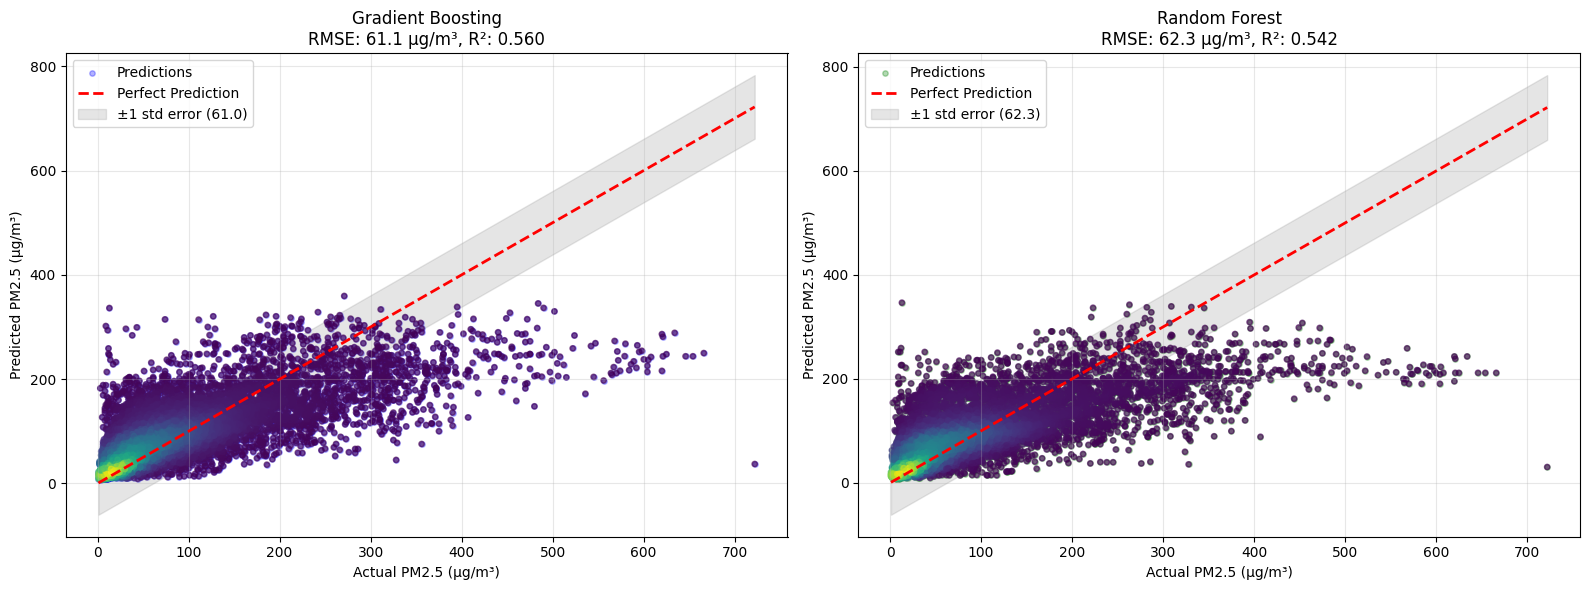

In [52]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Gradient Boosting with error analysis
axes[0].scatter(y_test, y_pred_gb, alpha=0.3, color='blue', s=15, label='Predictions')
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')

# error bands (1 standard deviation)
residuals_gb = y_pred_gb - y_test
std_error = residuals_gb.std()
axes[0].fill_between([y_test.min(), y_test.max()], 
                     [y_test.min() - std_error, y_test.max() - std_error],
                     [y_test.min() + std_error, y_test.max() + std_error],
                     alpha=0.2, color='gray', label=f'±1 std error ({std_error:.1f})')

axes[0].set_xlabel('Actual PM2.5 (µg/m³)')
axes[0].set_ylabel('Predicted PM2.5 (µg/m³)')
axes[0].set_title(f'Gradient Boosting\nRMSE: {rmse_gb:.1f} µg/m³, R²: {r2_gb:.3f}')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Adding density contours for high-density regions
x = y_test.values.flatten()
y = y_pred_gb.flatten()
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
axes[0].scatter(x, y, c=z, s=15, alpha=0.6, cmap='viridis')


axes[1].scatter(y_test, y_pred_rf, alpha=0.3, color='green', s=15, label='Predictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Perfect Prediction')


residuals_rf = y_pred_rf - y_test
std_error_rf = residuals_rf.std()
axes[1].fill_between([y_test.min(), y_test.max()], 
                     [y_test.min() - std_error_rf, y_test.max() - std_error_rf],
                     [y_test.min() + std_error_rf, y_test.max() + std_error_rf],
                     alpha=0.2, color='gray', label=f'±1 std error ({std_error_rf:.1f})')

axes[1].set_xlabel('Actual PM2.5 (µg/m³)')
axes[1].set_ylabel('Predicted PM2.5 (µg/m³)')
axes[1].set_title(f'Random Forest\nRMSE: {rmse_rf:.1f} µg/m³, R²: {r2_rf:.3f}')
axes[1].legend(loc='upper left')
axes[1].grid(True, alpha=0.3)

# Adding density contours
x = y_test.values.flatten()
y = y_pred_rf.flatten()
xy = np.vstack([x, y])
z = stats.gaussian_kde(xy)(xy)
axes[1].scatter(x, y, c=z, s=15, alpha=0.6, cmap='viridis')

plt.tight_layout()
plt.show()

Looking at the two scatter plots, both models do a decent job when pollution levels are low to moderate, but they start to struggle once PM2.5 values get very high. In those extreme cases, both models tend to under-predict, meaning they cannot fully capture the worst pollution spikes. That said, Gradient Boosting performs slightly better overall. It has a lower RMSE of 61.1 and a higher R² value of 0.56, which shows it explains the data a bit better than Random Forest, which has an R² of 0.54. Overall, both models capture general trends fairly well, but neither handles extreme pollution events very accurately.

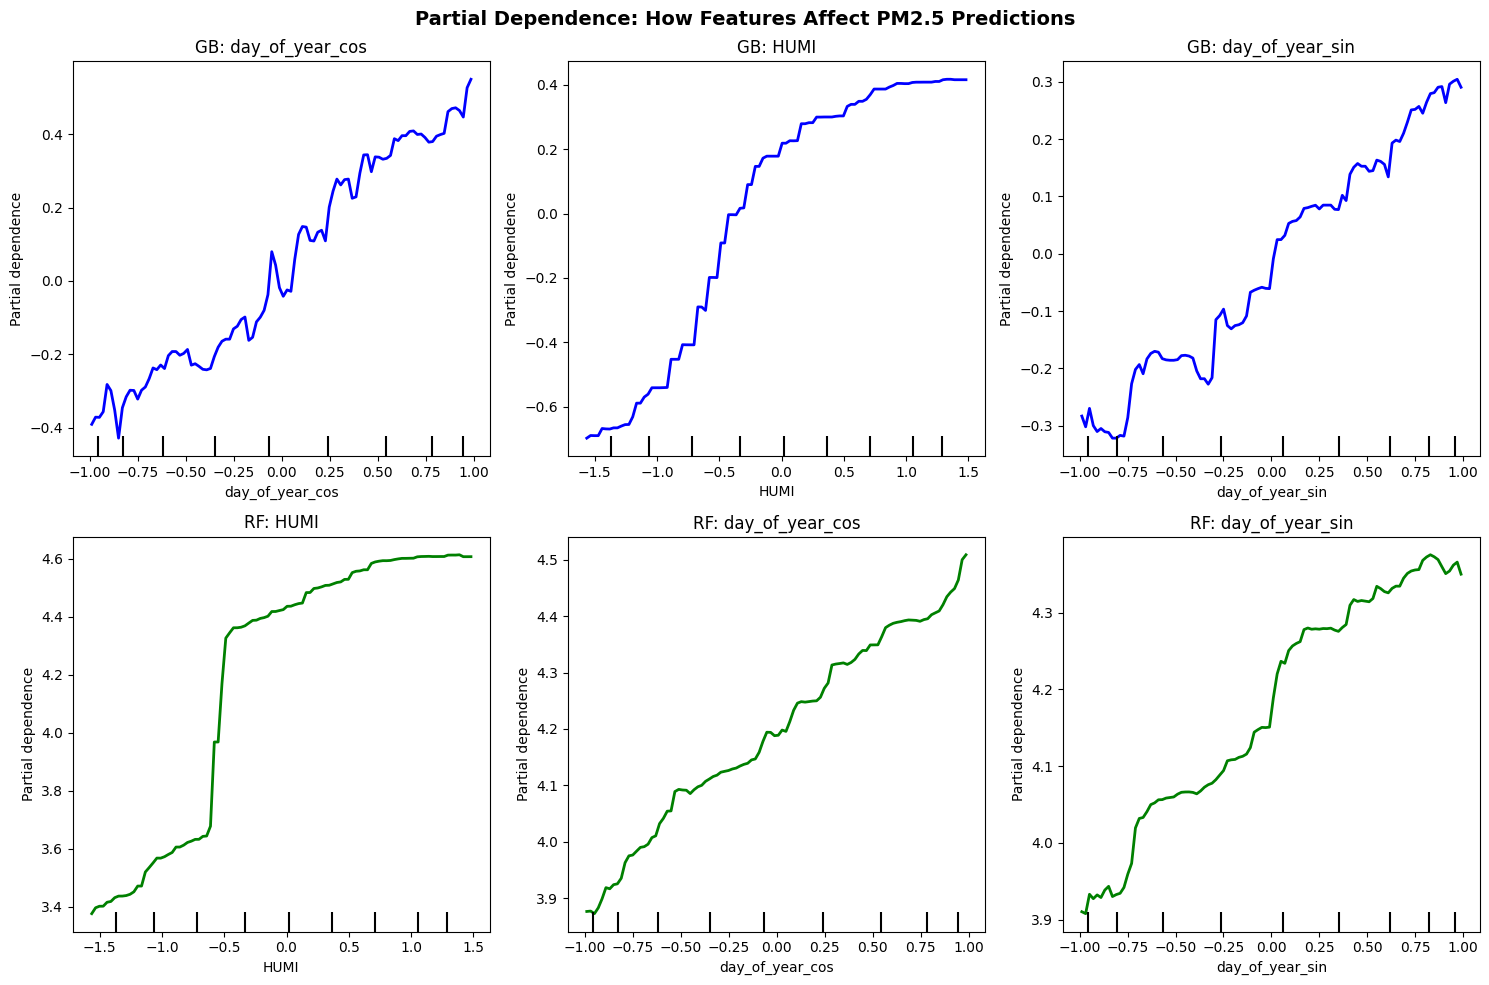

In [53]:

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# For Gradient Boosting - Top 3 most important features
top_gb_features = top_features_gb[:3] if len(top_features_gb) >= 3 else top_features_gb

for i, feature in enumerate(top_gb_features[:3]):  # First 3 features
    ax = axes[0, i]
    PartialDependenceDisplay.from_estimator(
        gb_final, 
        X_train_gb_selected, 
        features=[feature],
        ax=ax,
        line_kw={"color": "blue", "linewidth": 2}
    )
    ax.set_title(f'GB: {feature}')
    ax.grid(True, alpha=0.3)

# For Random Forest - Top 3 most important features
top_rf_features = top_features_rf[:3] if len(top_features_rf) >= 3 else top_features_rf

for i, feature in enumerate(top_rf_features[:3]):  # First 3 features
    ax = axes[1, i]
    PartialDependenceDisplay.from_estimator(
        rf_final, 
        X_train_rf_selected, 
        features=[feature],
        ax=ax,
        line_kw={"color": "green", "linewidth": 2}
    )
    ax.set_title(f'RF: {feature}')
    ax.grid(True, alpha=0.3)

plt.suptitle('Partial Dependence: How Features Affect PM2.5 Predictions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Checking model in different condition

In [54]:
#Checking how a model would react if we train_test split randomly instead of timely

from sklearn.model_selection import train_test_split

X_train_shuf, X_test_shuf, y_train_shuf, y_test_shuf = train_test_split(
    X_train_final, y_train_log, test_size=0.2, random_state=42
)

# Fitting Gradient Boosting
gb_shuf = gb_final
gb_shuf.fit(X_train_shuf, y_train_shuf)

y_pred_log = gb_shuf.predict(X_test_shuf)
y_pred = np.expm1(y_pred_log)

from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(np.expm1(y_test_shuf), y_pred))
r2 = r2_score(np.expm1(y_test_shuf), y_pred)
print("Shuffled Split RMSE:", rmse)
print("Shuffled Split R²:", r2)


Shuffled Split RMSE: 56.005173381140054
Shuffled Split R²: 0.614053526692432
